<a href="https://colab.research.google.com/github/Pietrosittoni/Deep_Learning_Based_Gait_Classification/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble


In [ ]:
#should add more strada facendo
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import keras
import time
import random
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import random

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#A Visual example





In [ ]:
subject = ["subject"+str(i) for i in range(1,13)]
trial = ["trial"+str(i) for i in range(1,21)]
# Dirs is a list with several foilders: subject1,subject2,etc..
path = "/content/drive/MyDrive/Progetto_HDA/HDA_proj_A2"
subject = os.listdir(path)
response_malattie = {"antalgic":1,"lurching":2,"normal":3,"steppage":4,"stiff-legged":5,"trendelenburg":6}

for i in subject[10:11]:
  pathsubject = path+"/"+i
  for j in list(response_malattie.keys())[0:1]:
    pathmalattia = pathsubject+"/"+j
    for l in trial[11:12]:
      pathtrial = pathmalattia+"/"+l
      path_= pathtrial+"/skeleton.csv"
      full_kinect = pd.read_csv(path_,header=None).to_numpy()[:,1:-1]  # first colums composed by Nan

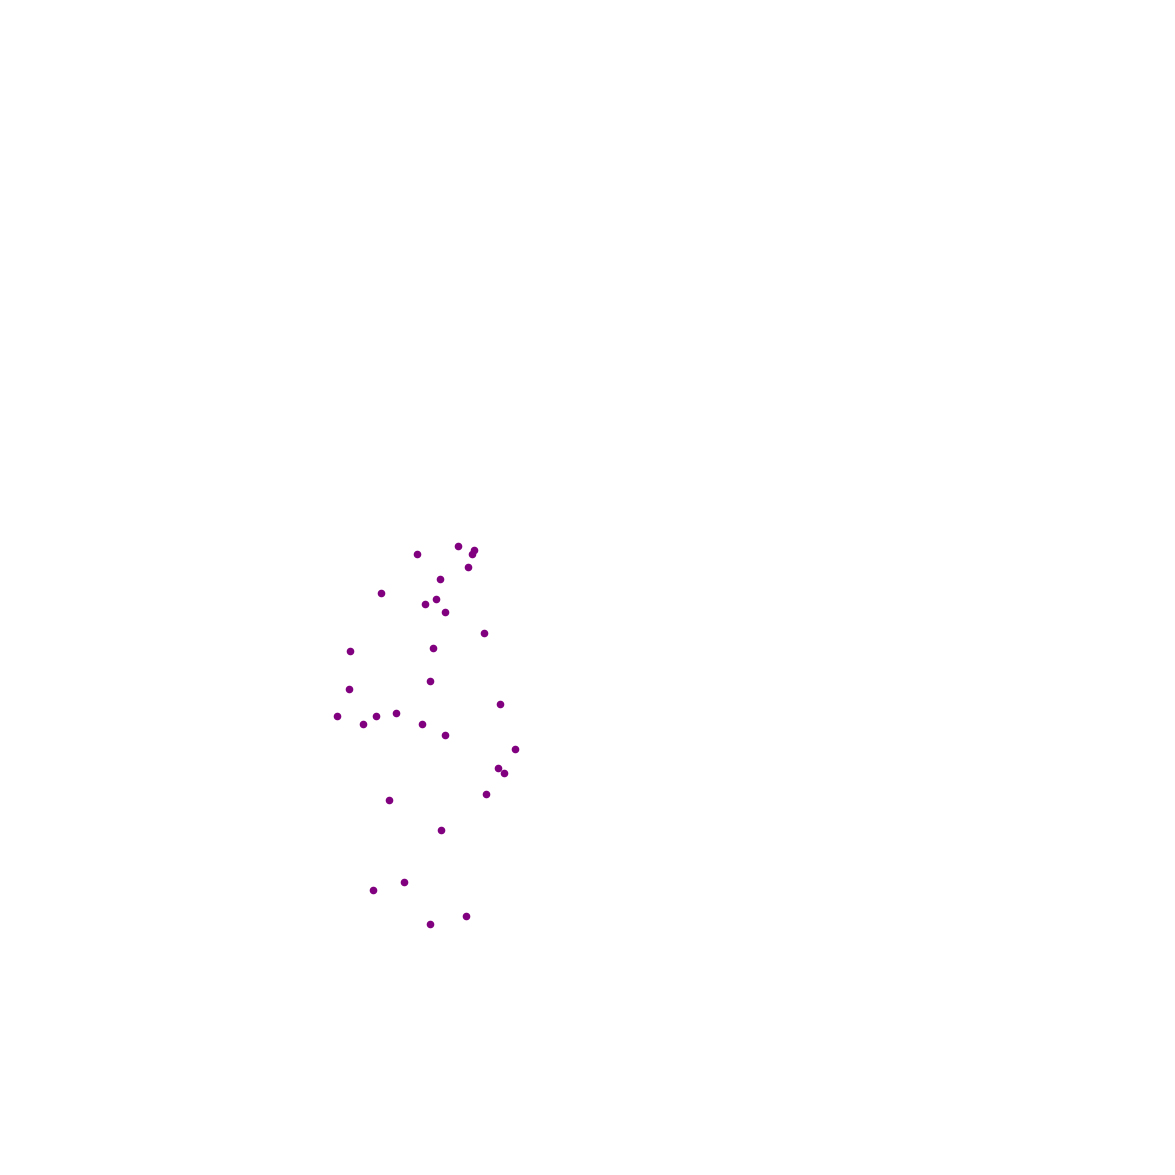

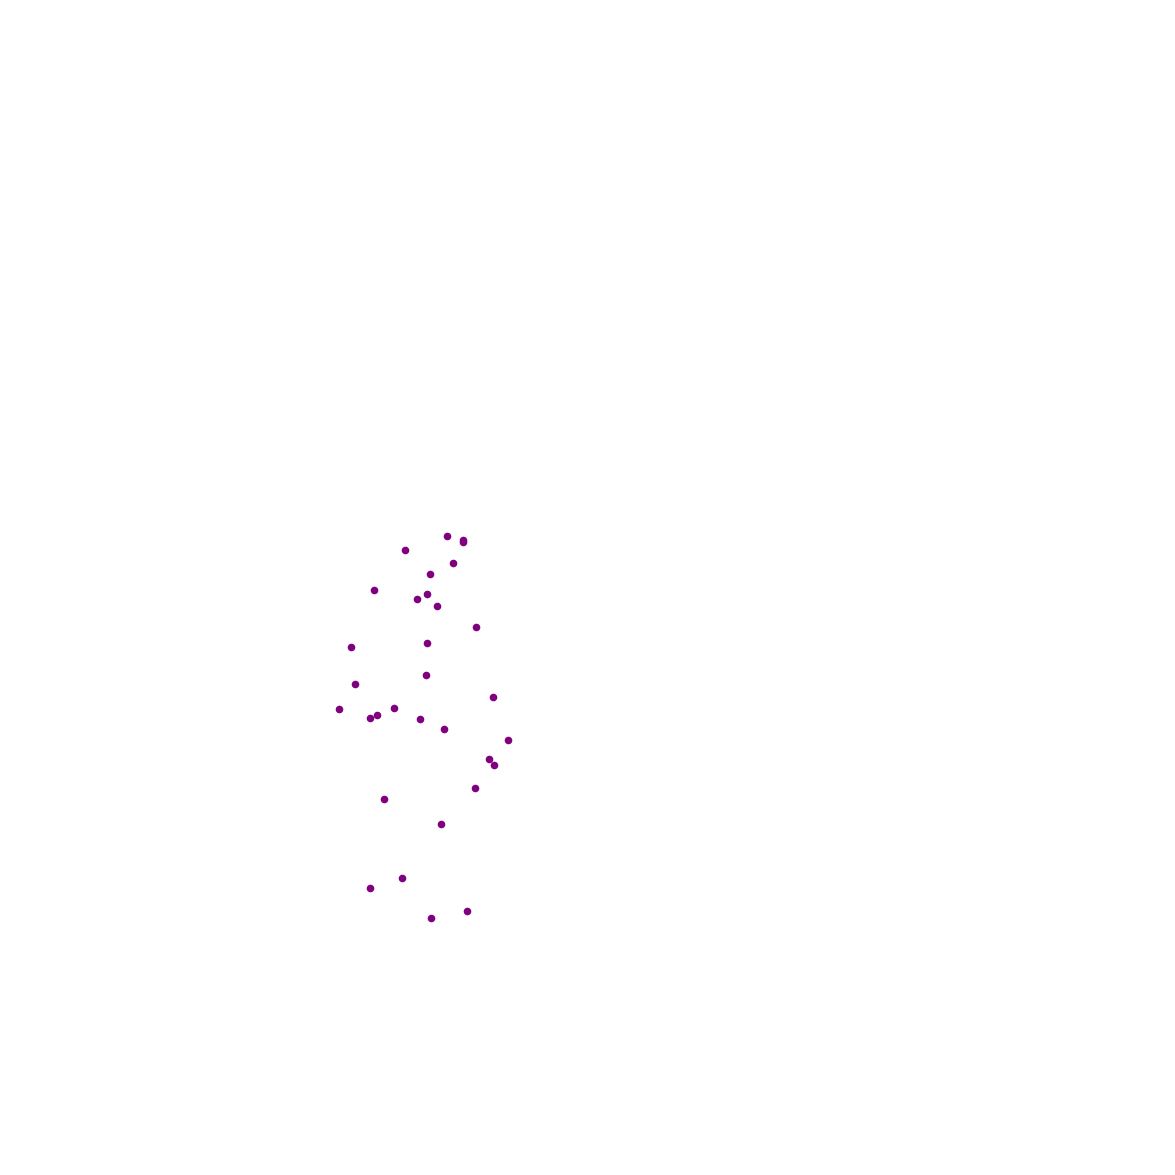

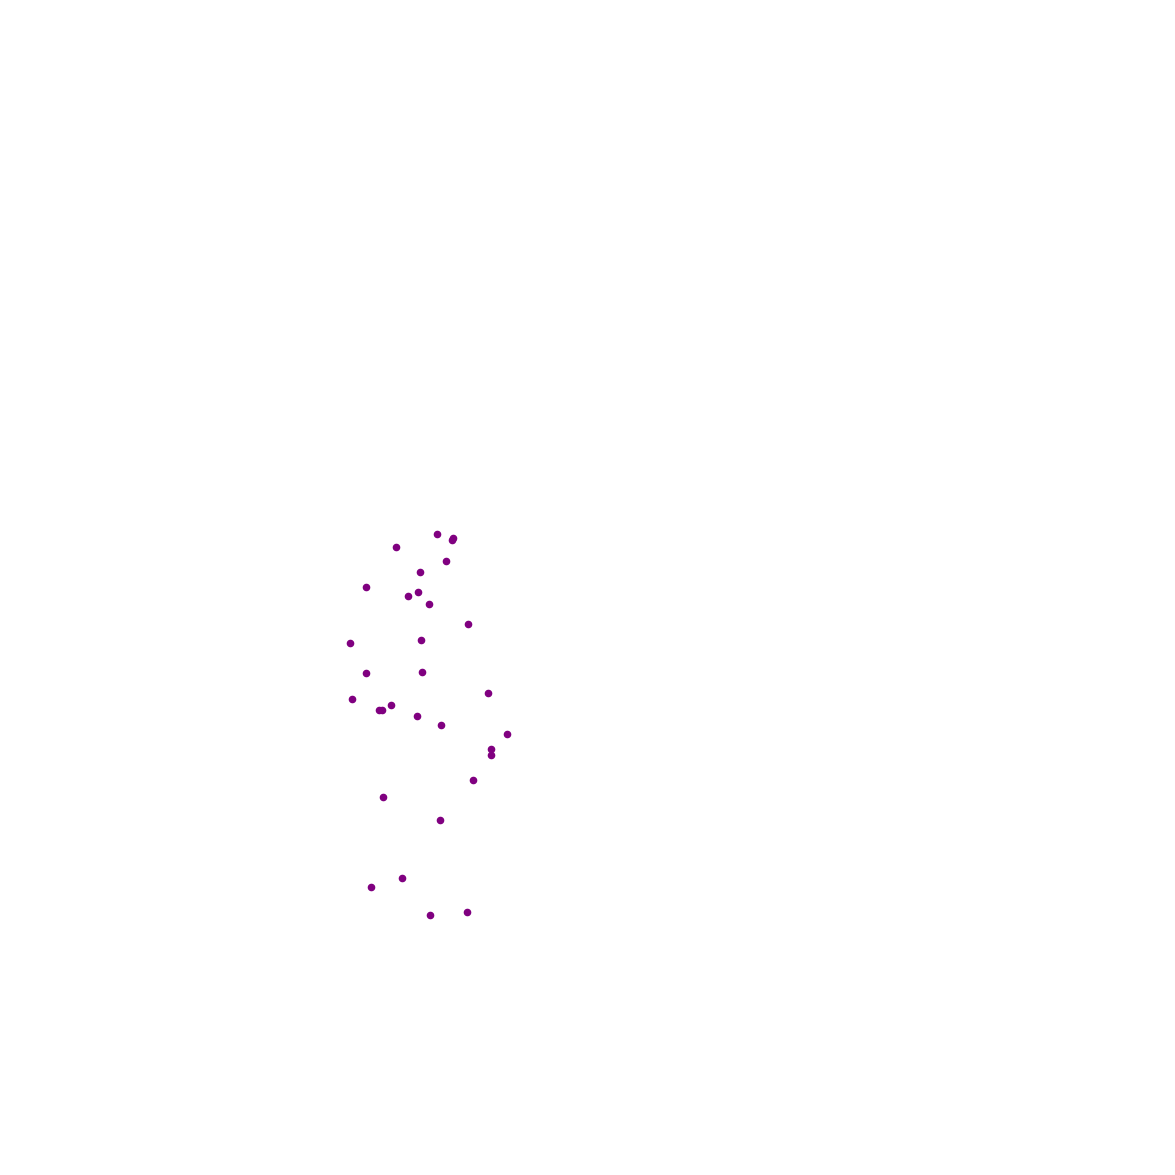

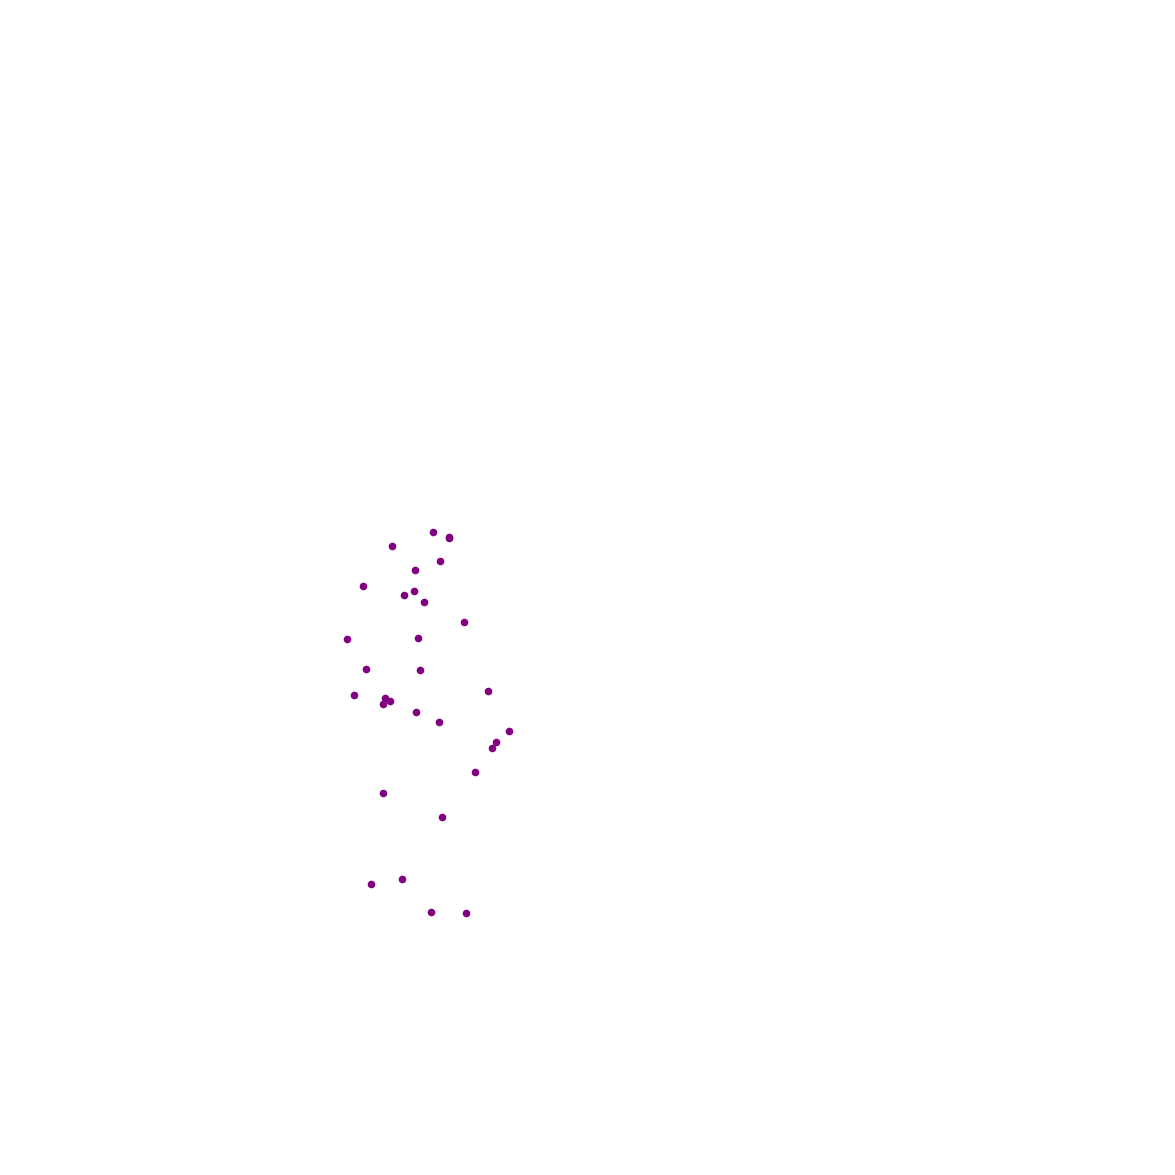

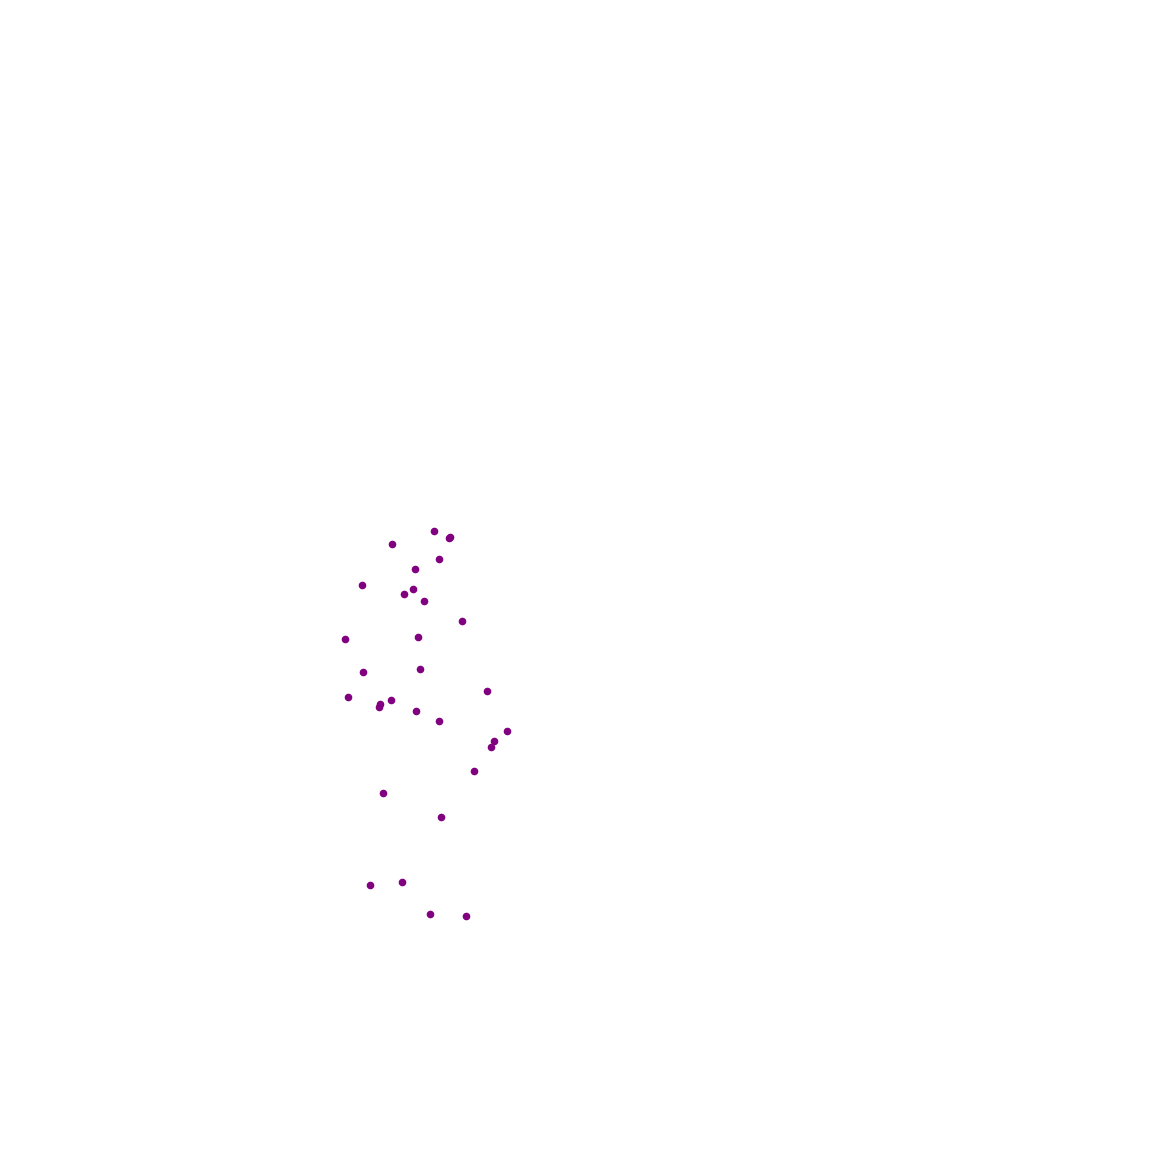

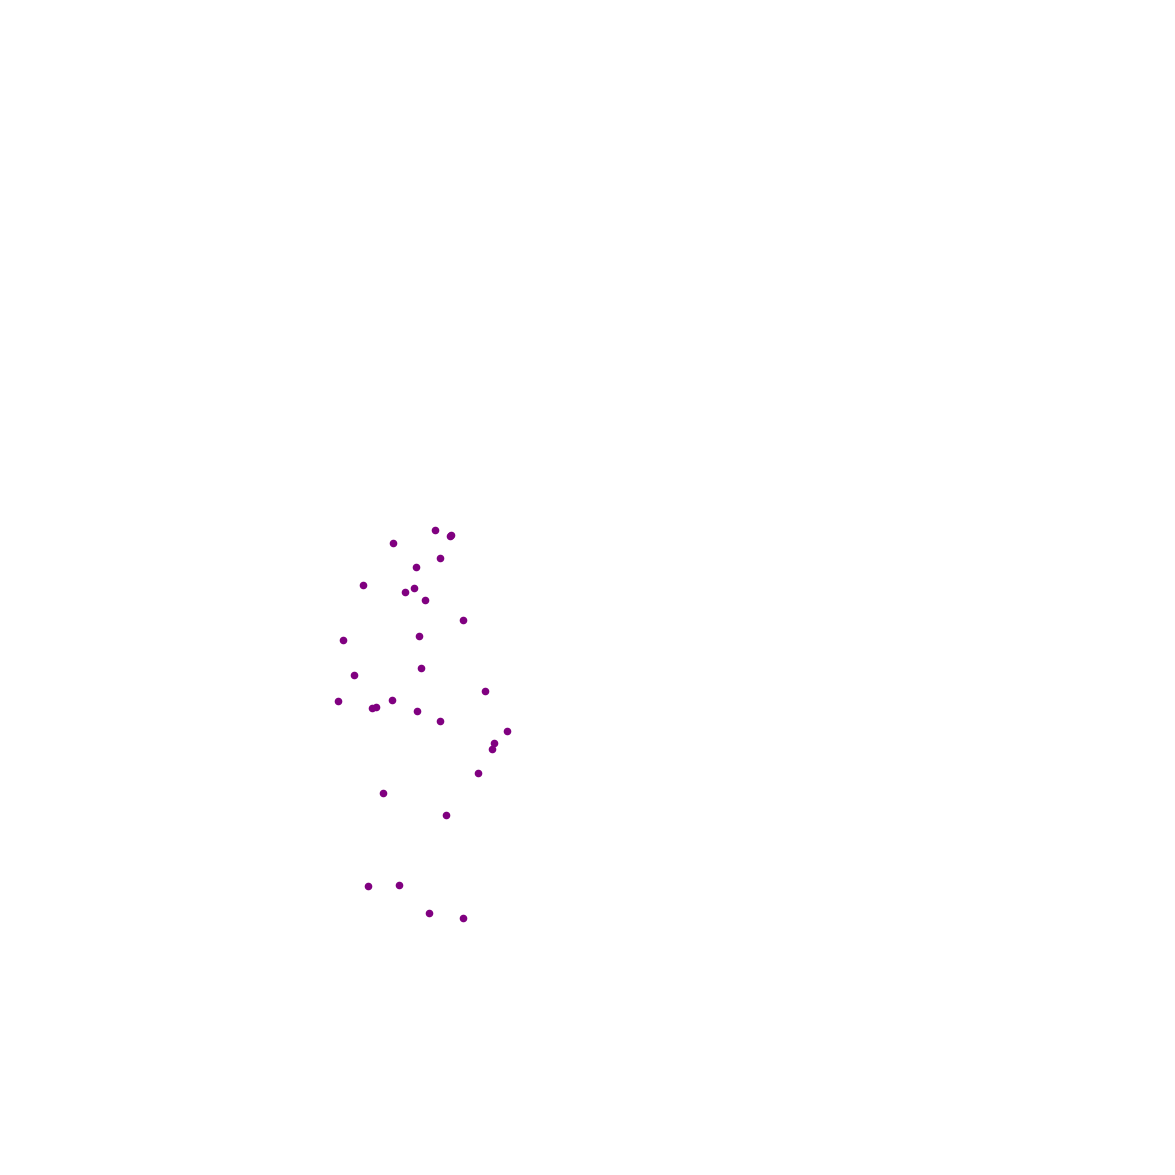

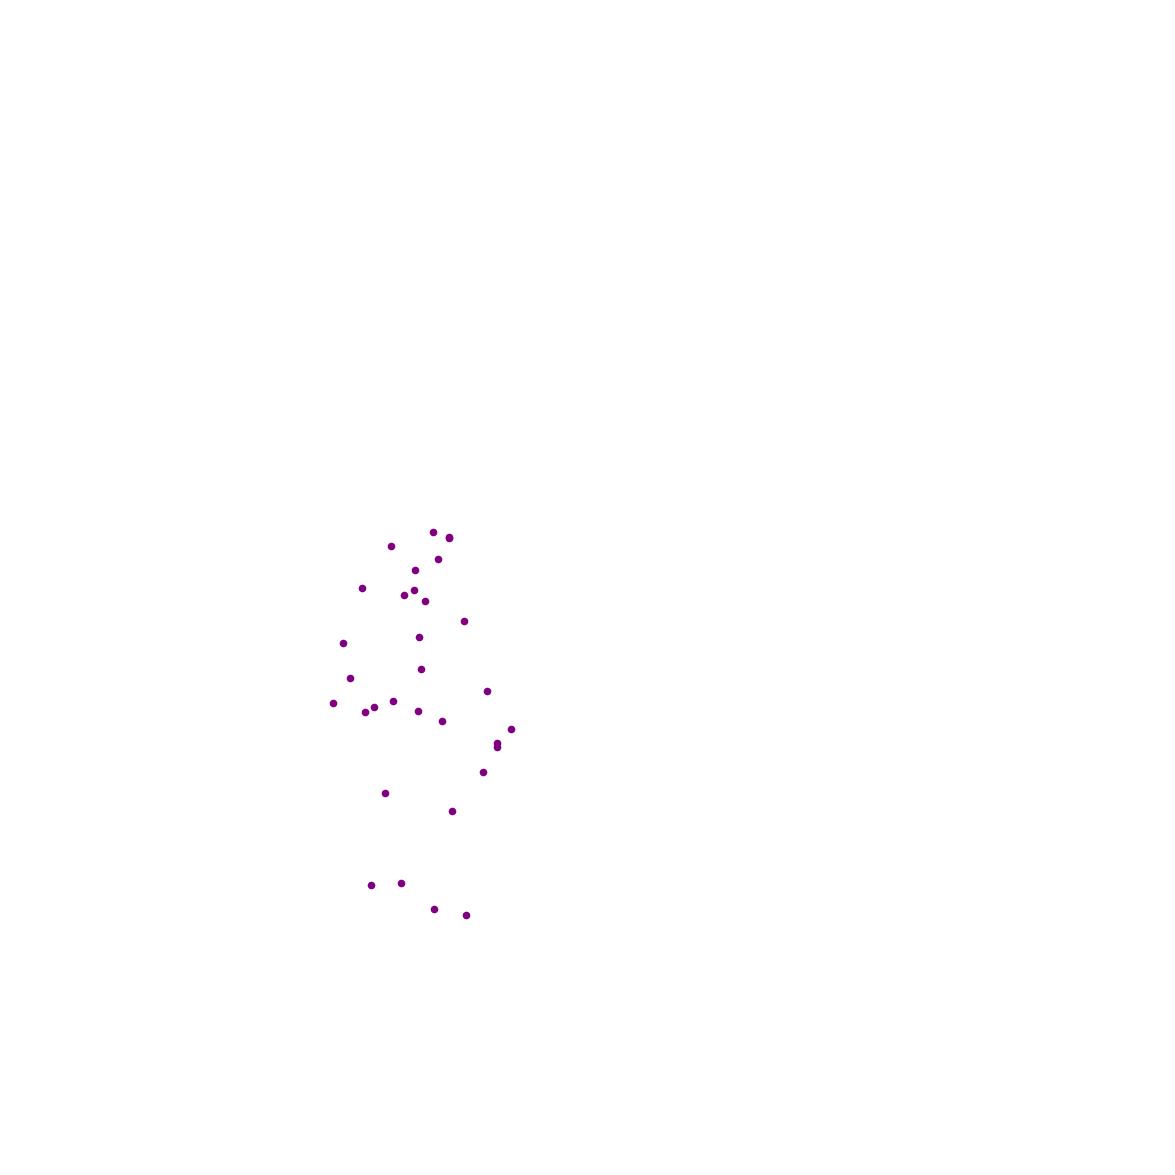

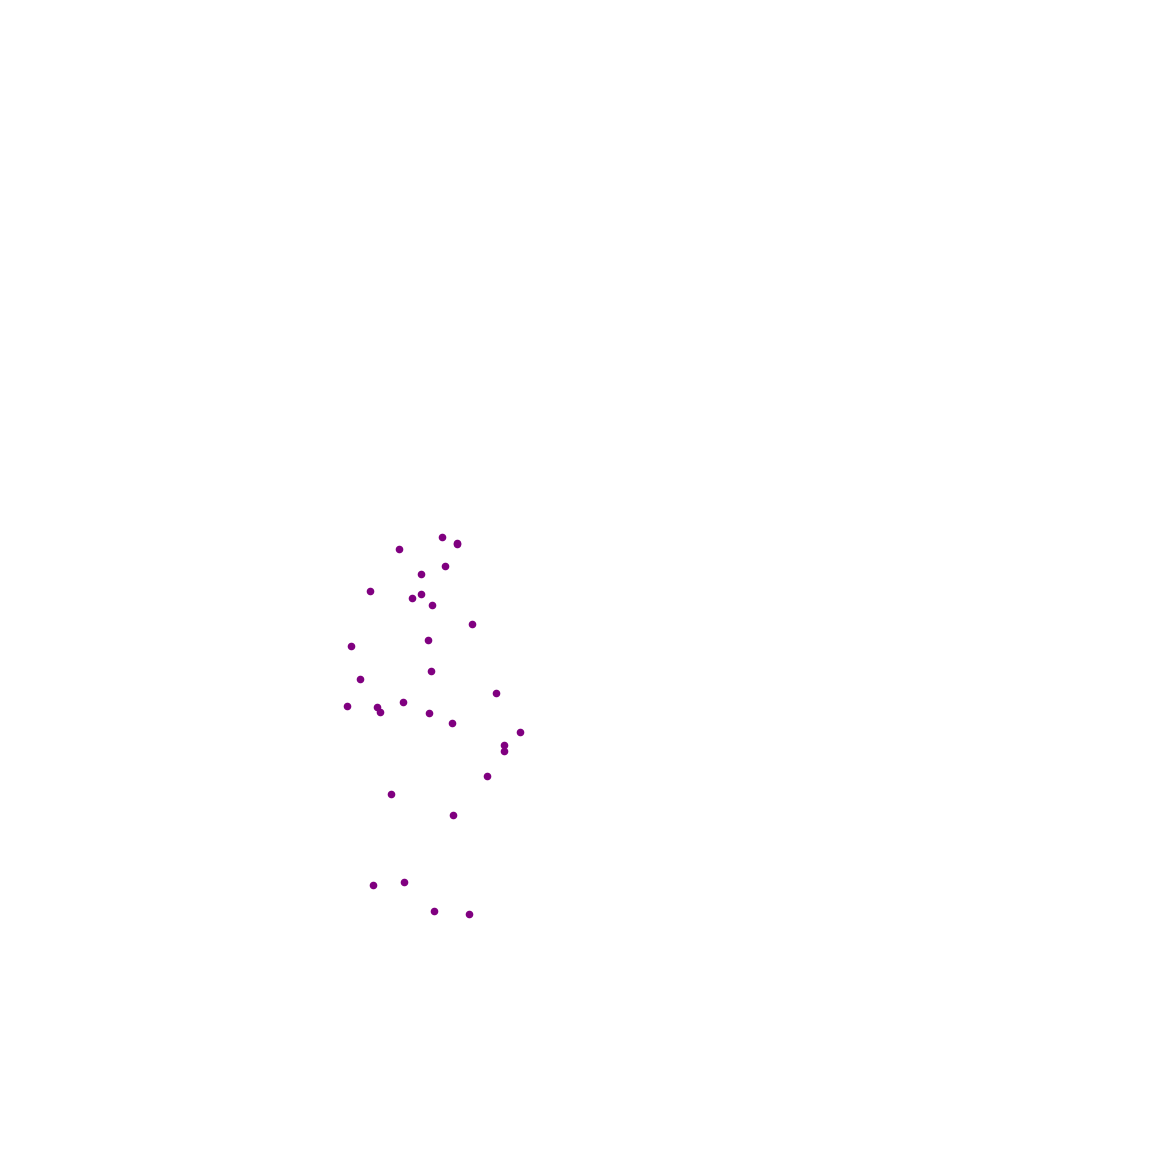

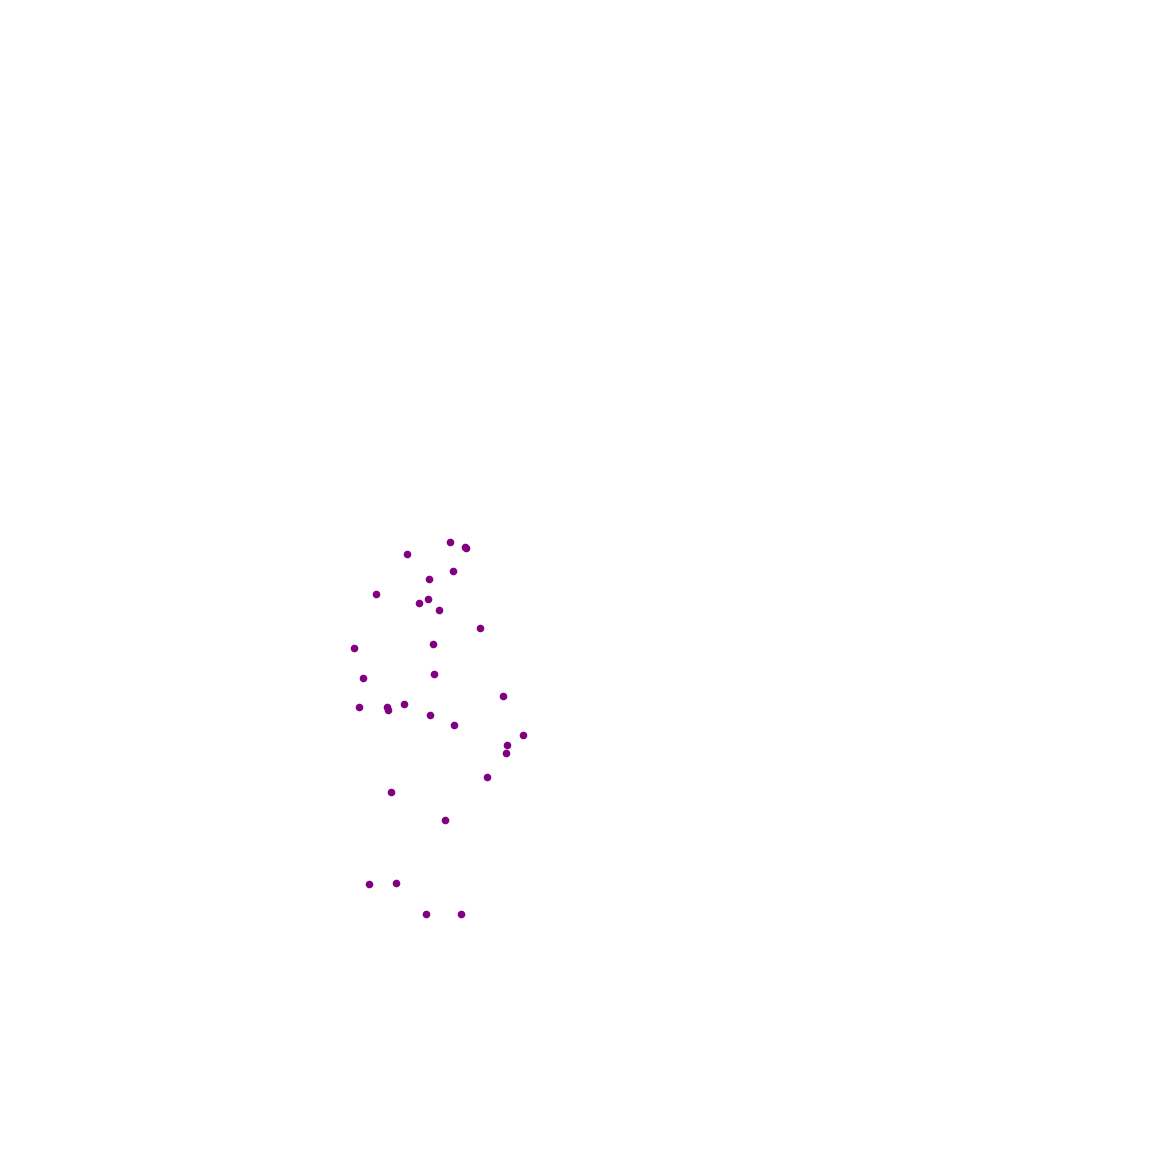

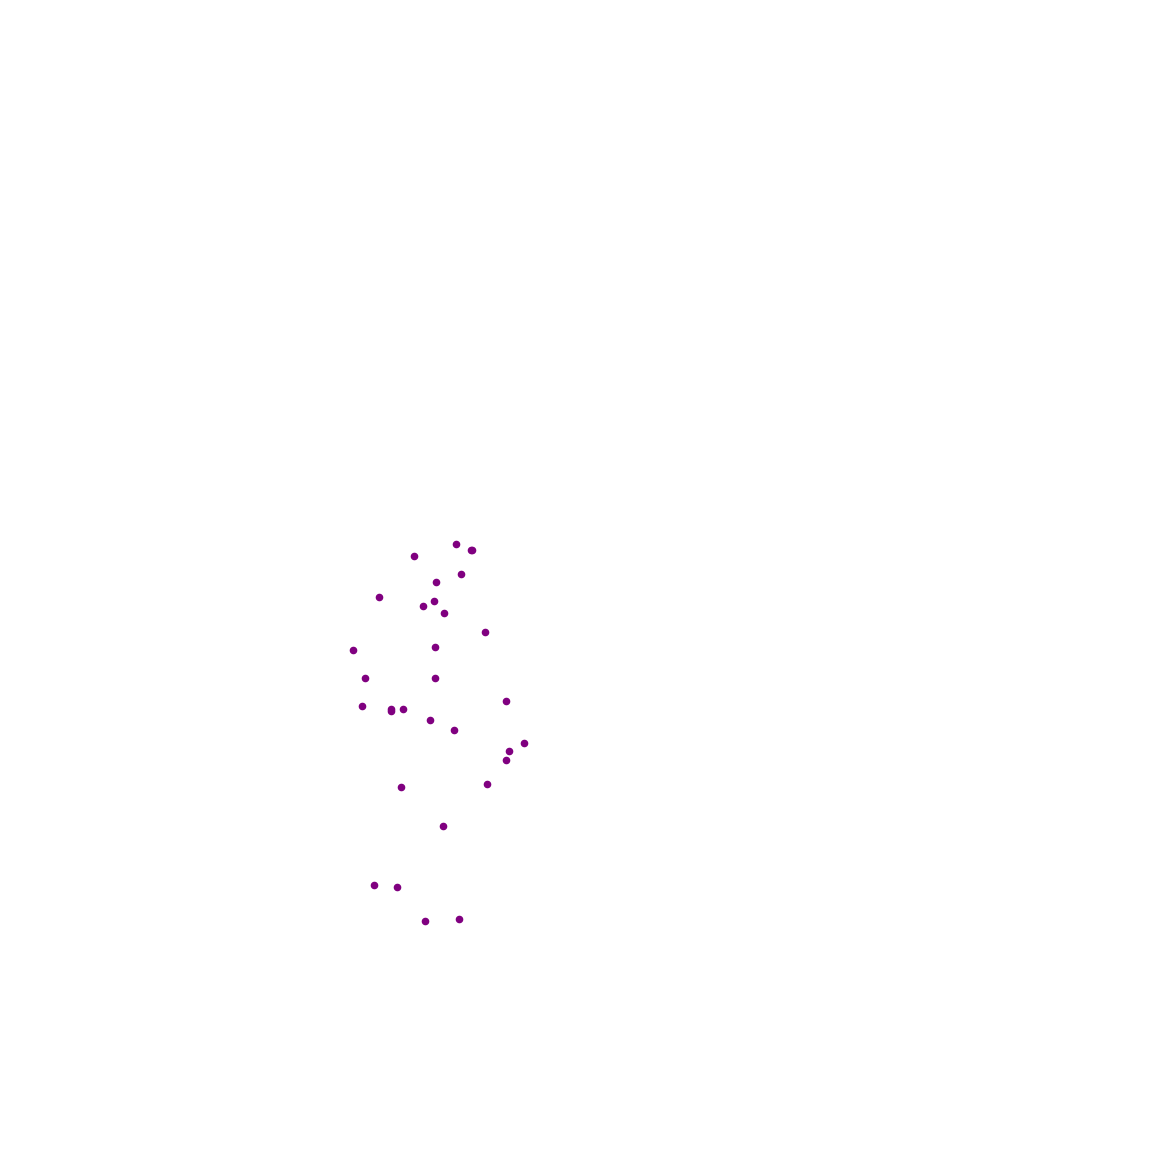

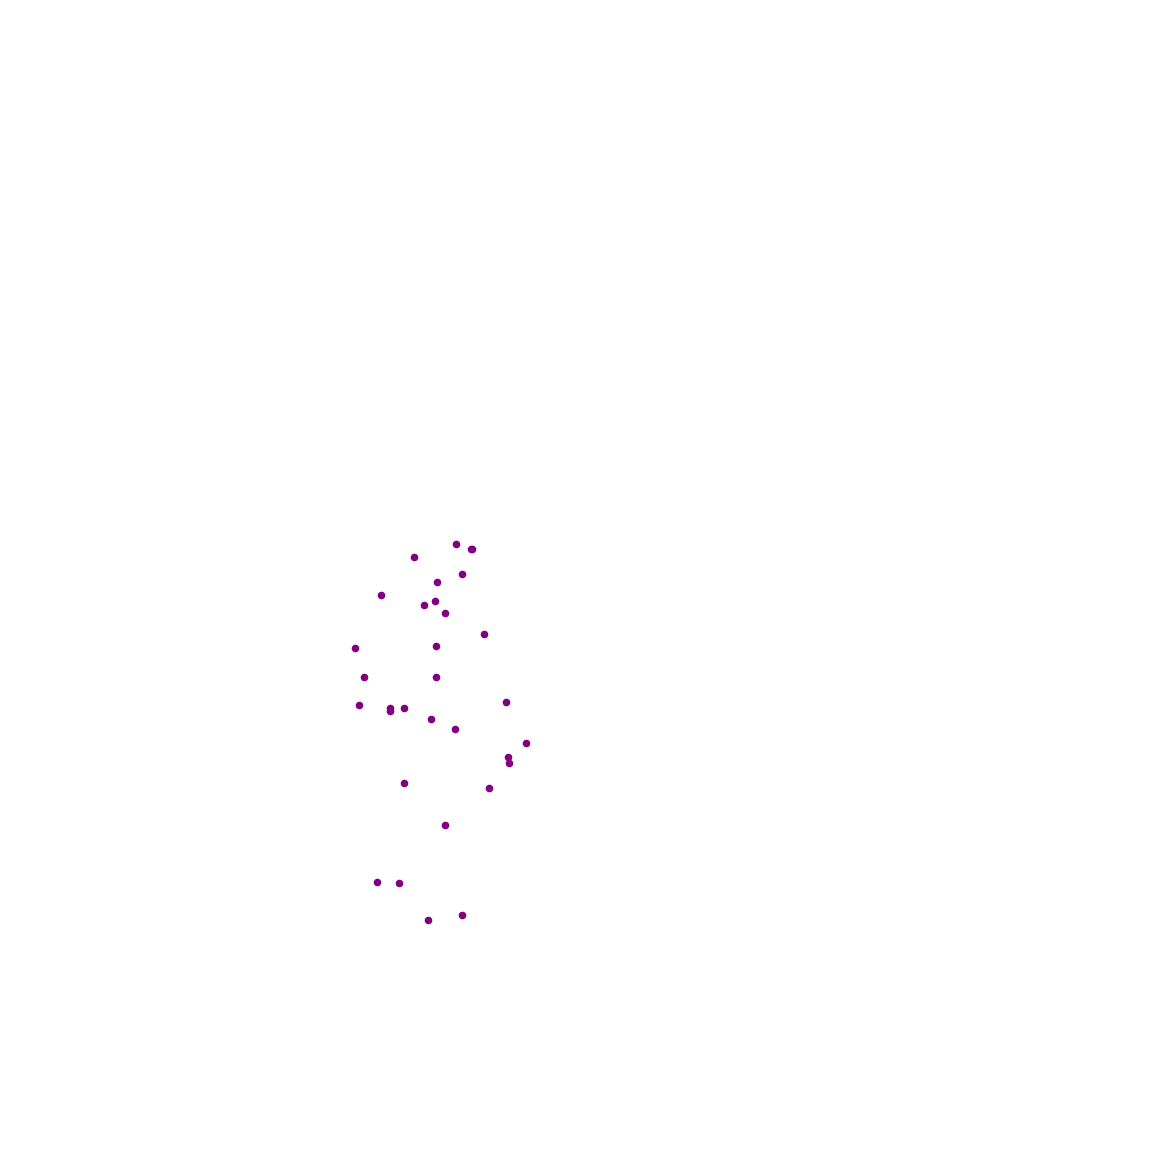

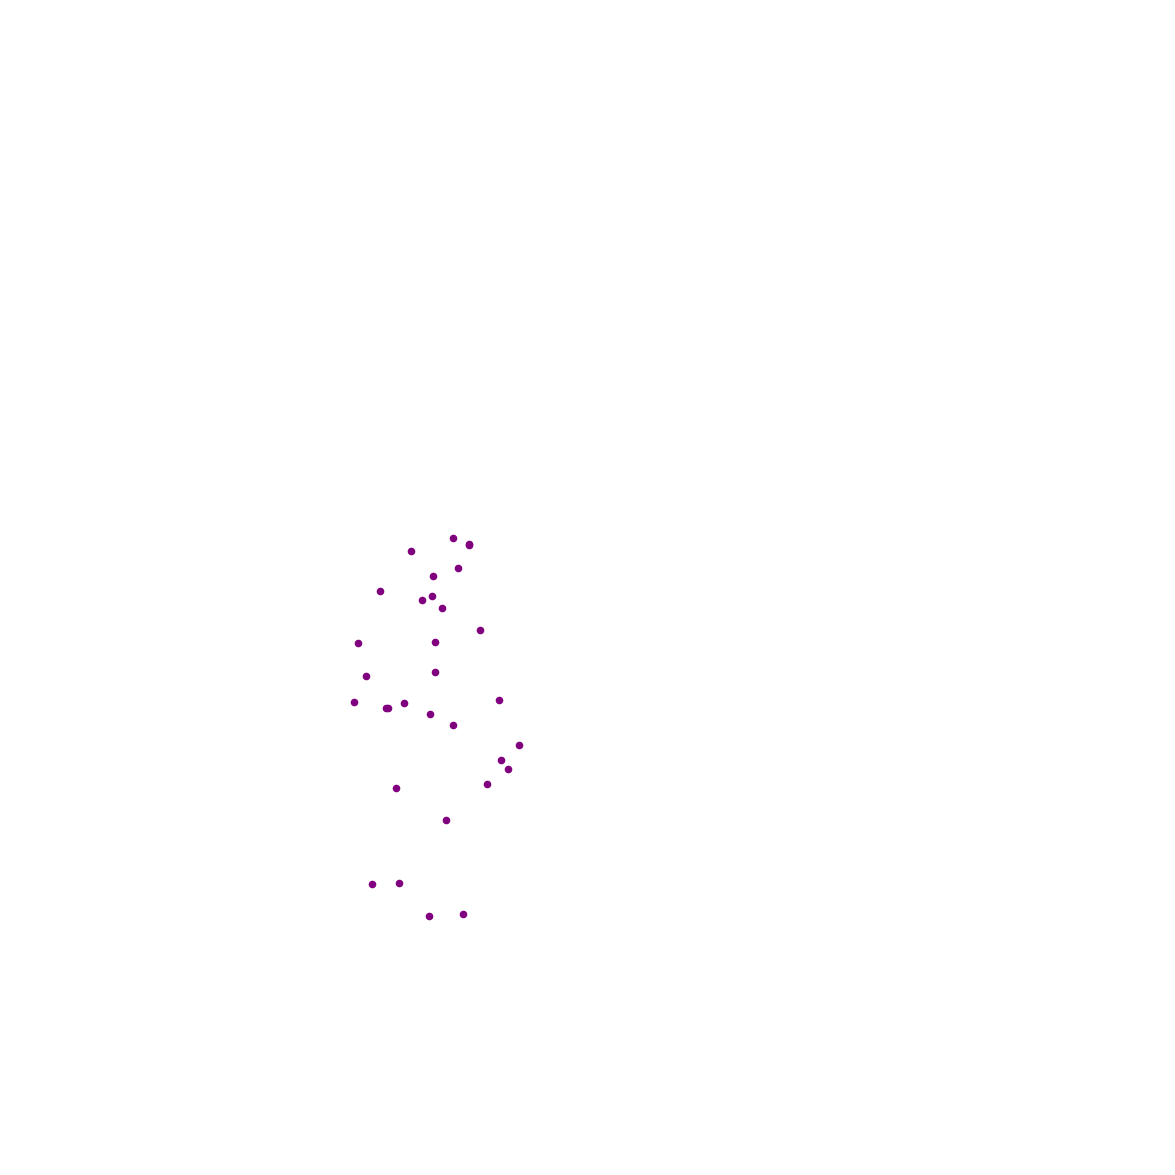

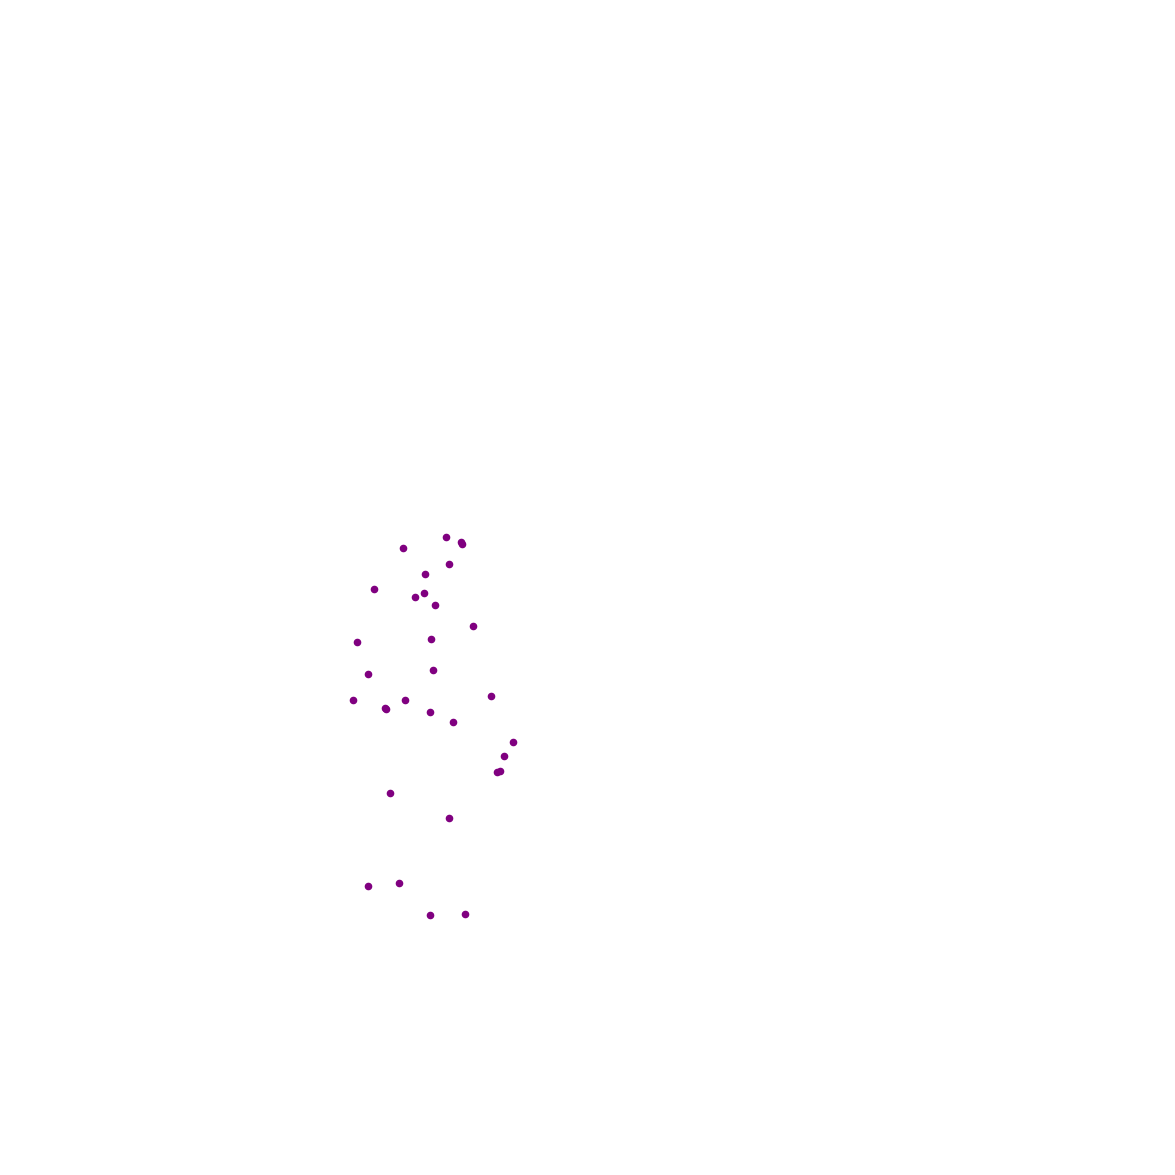

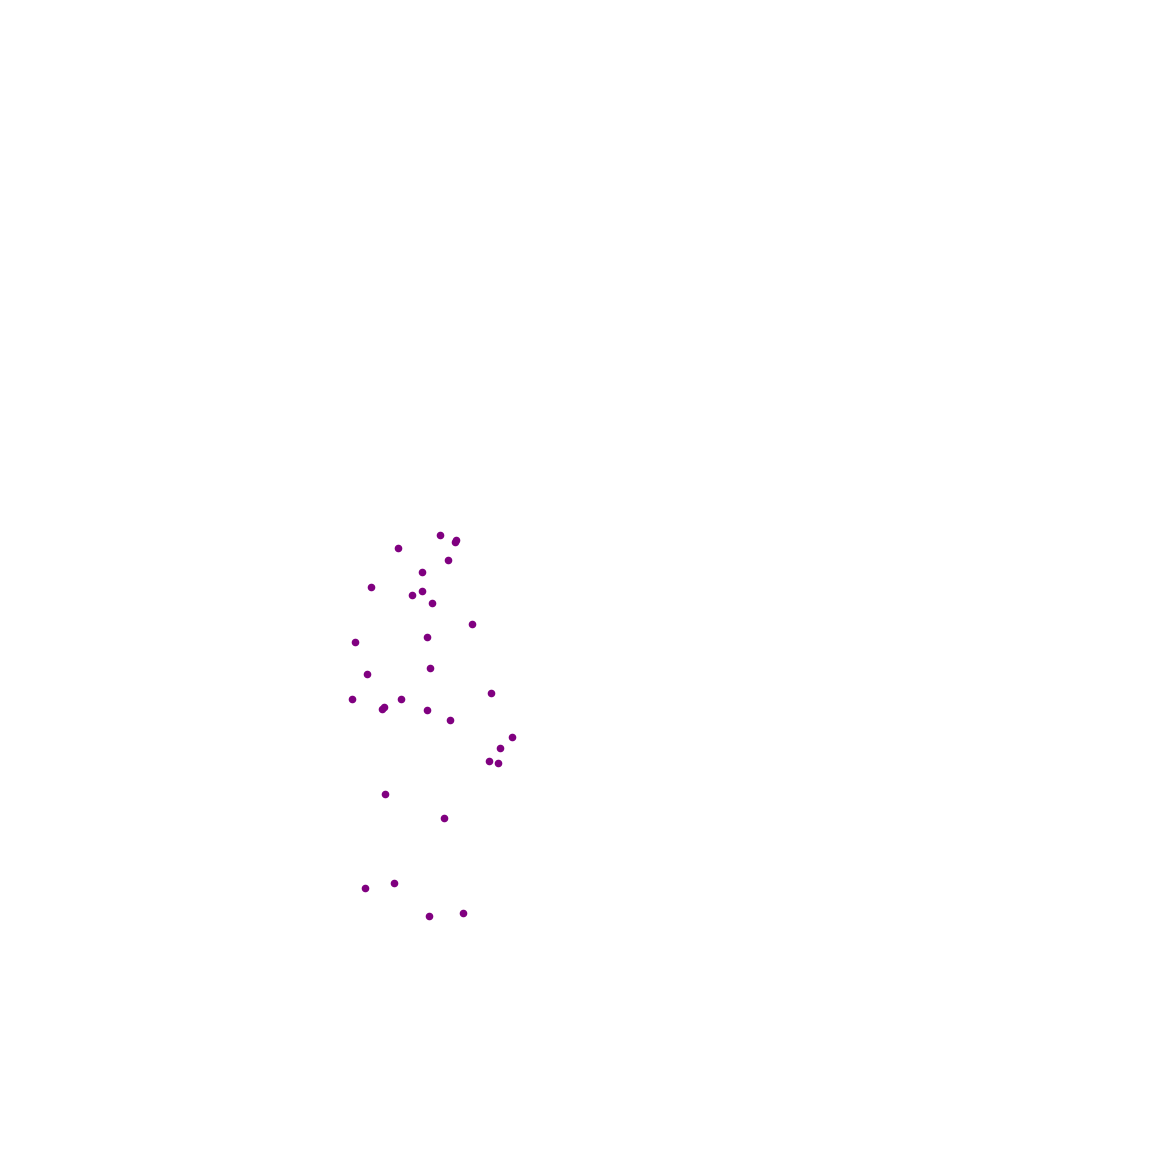

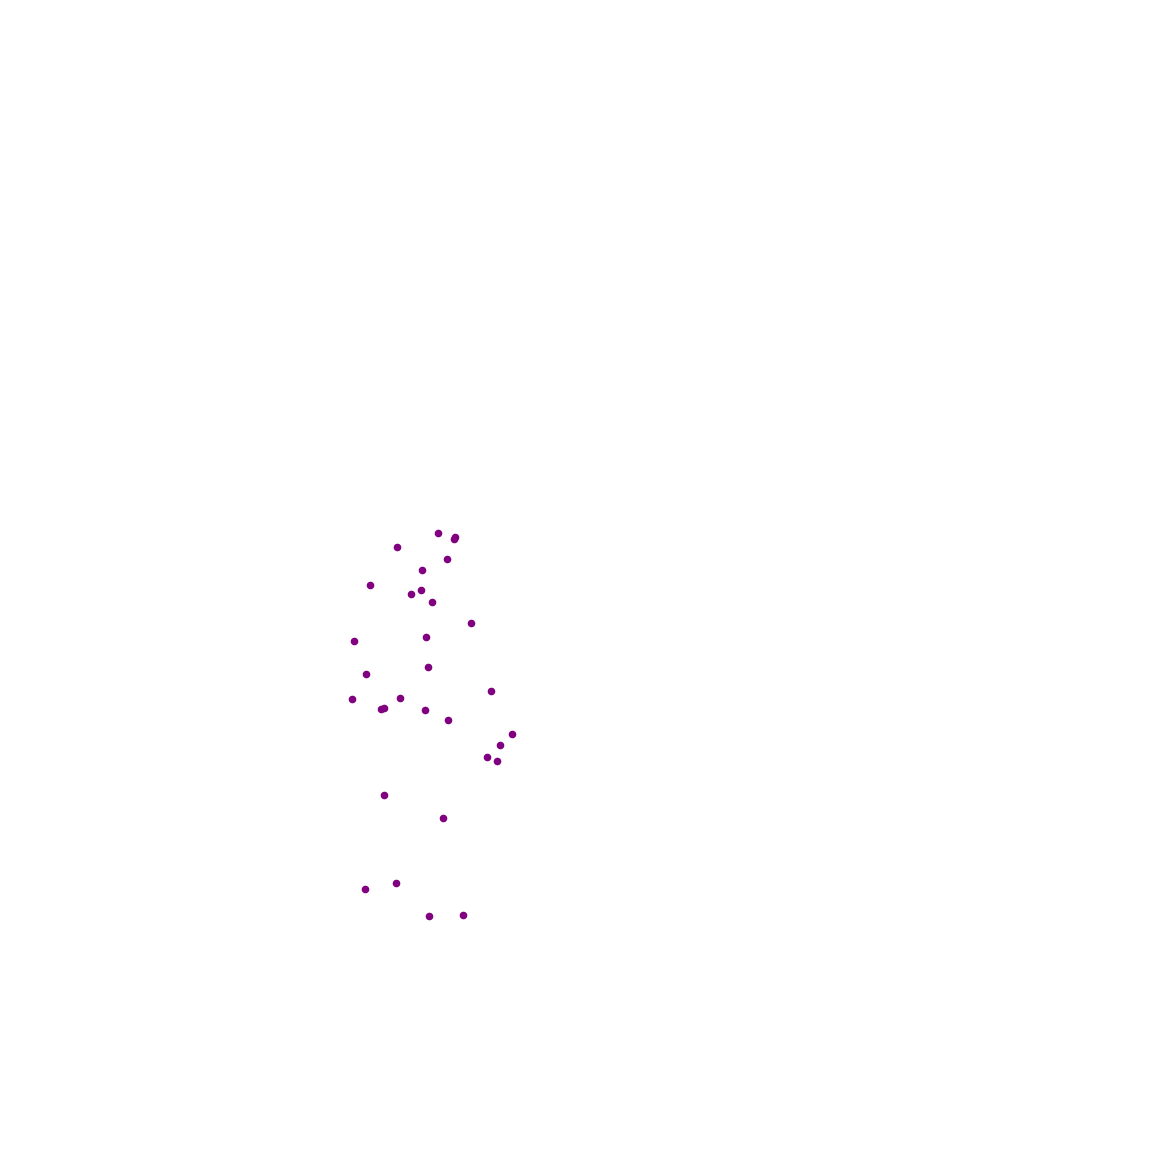

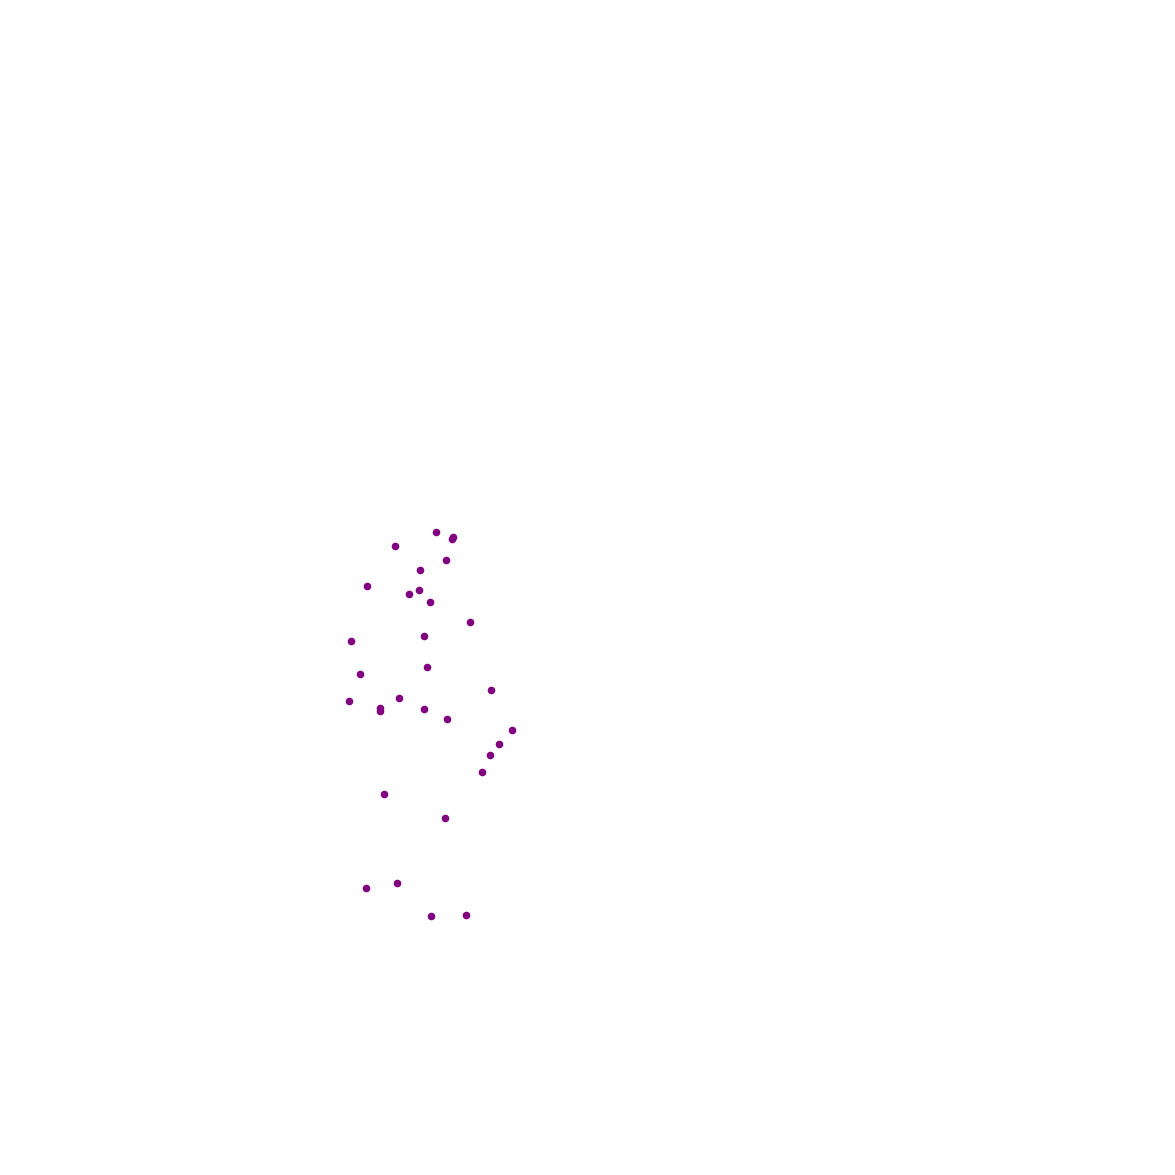

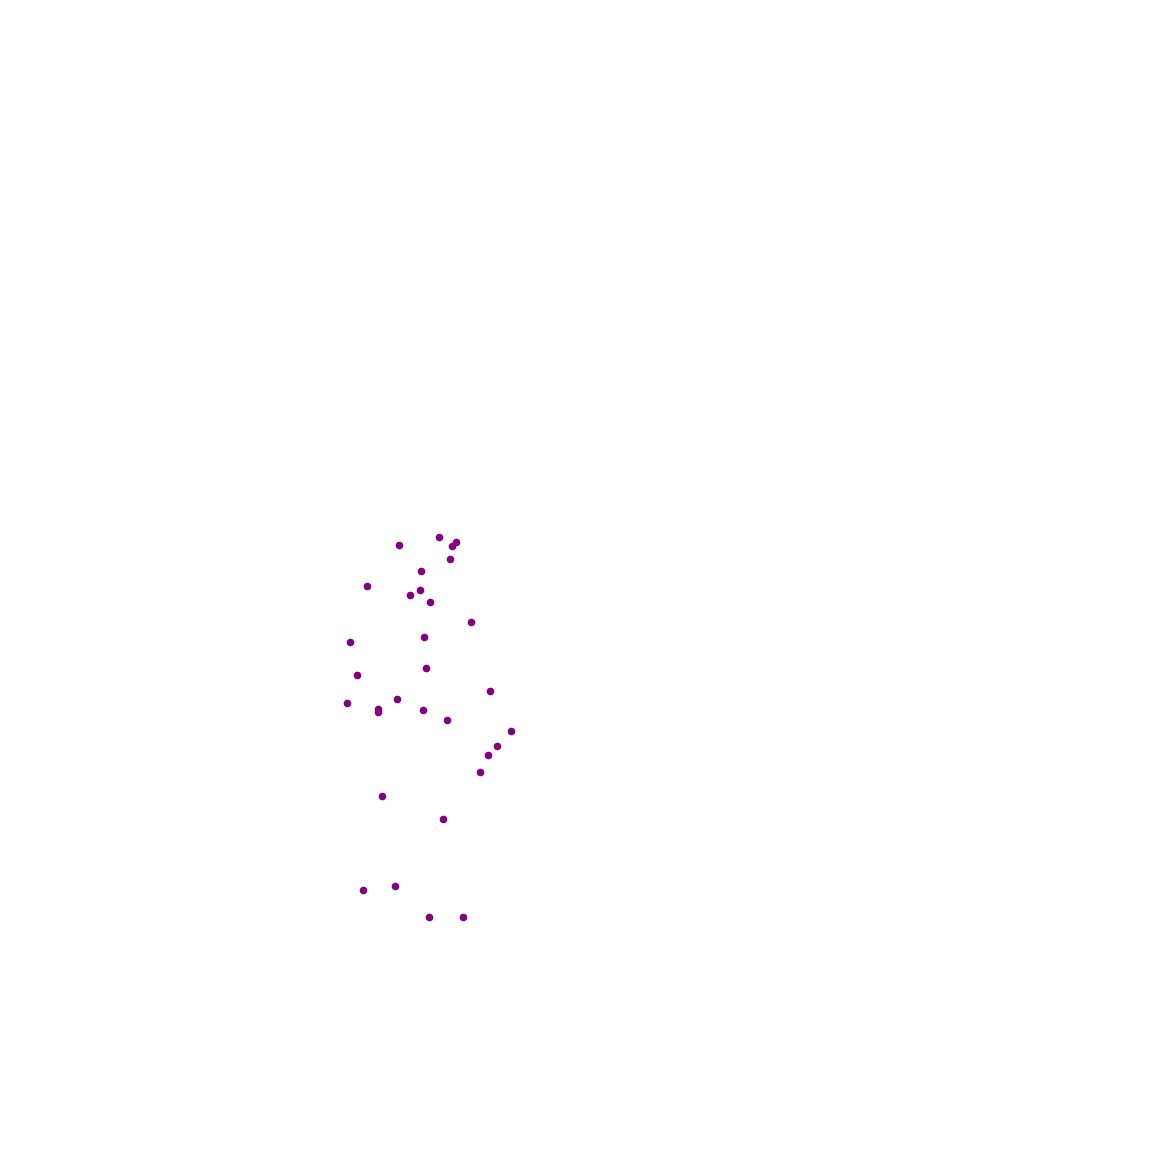

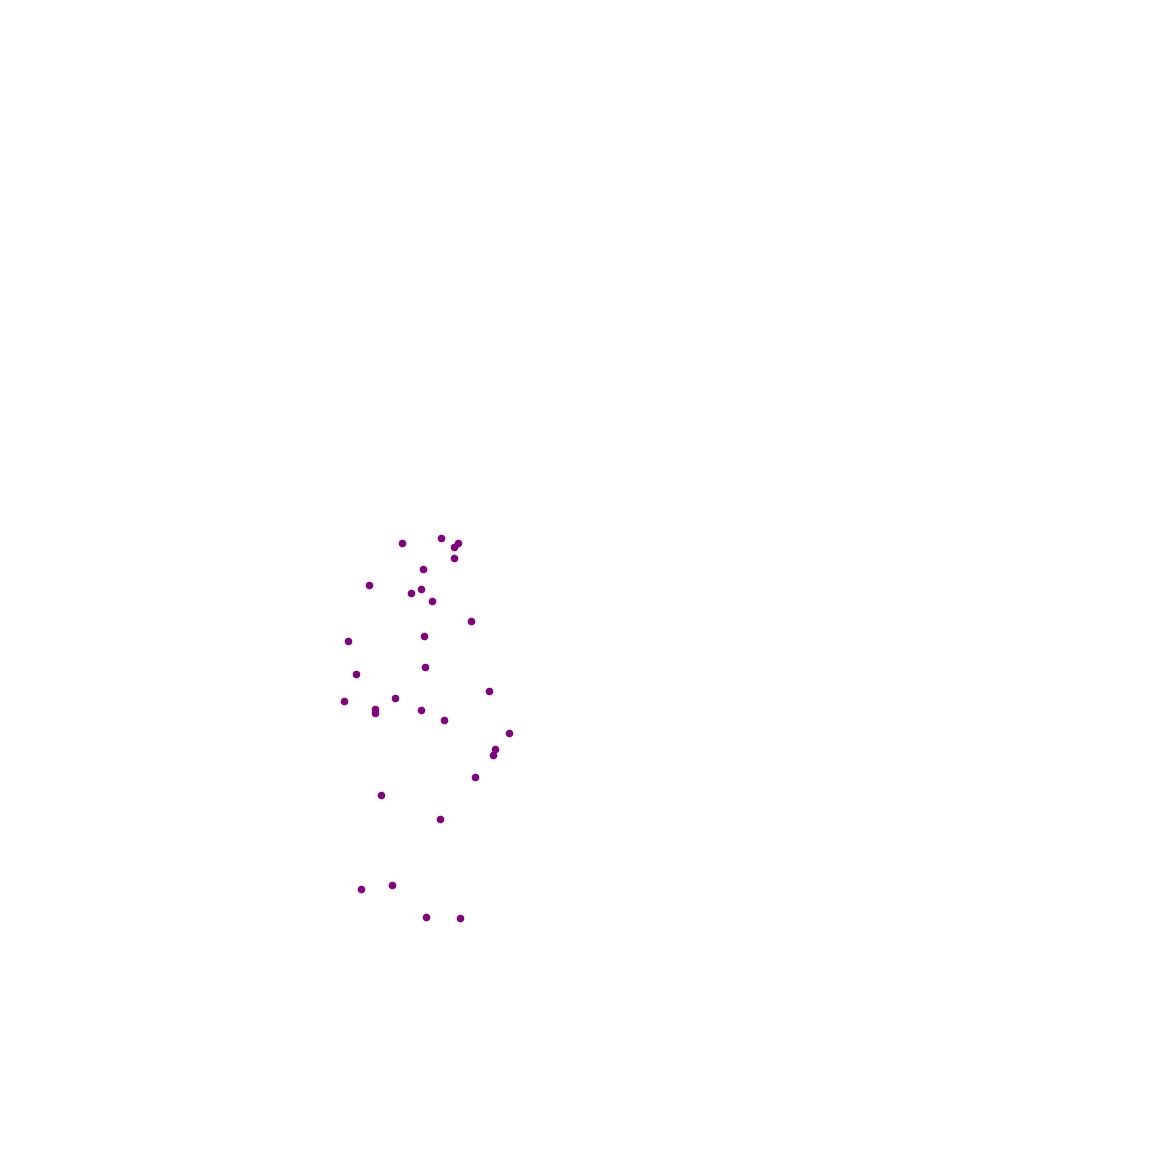

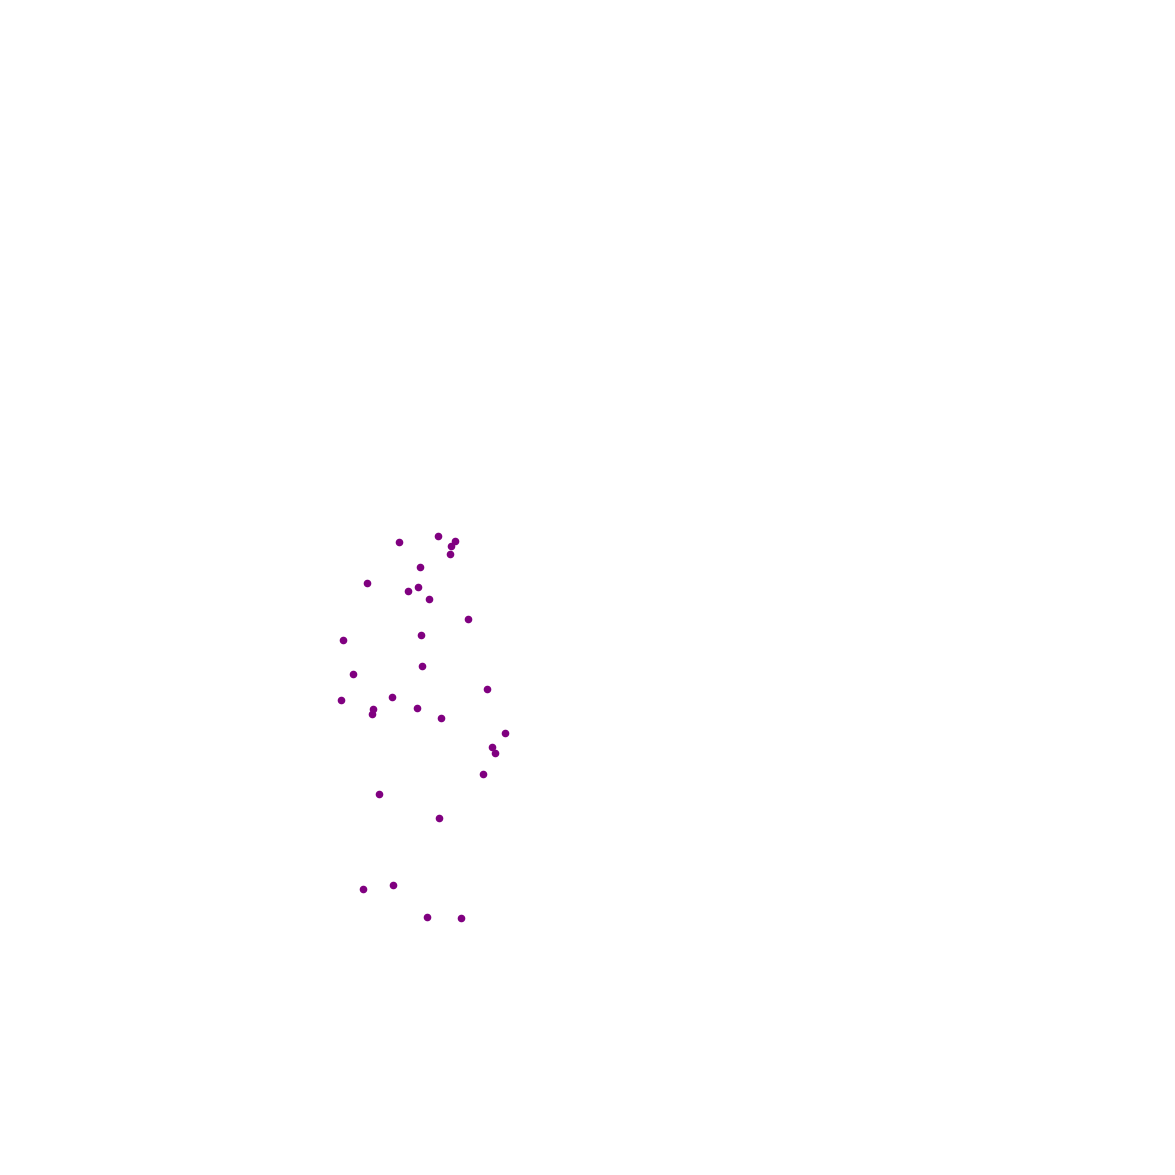

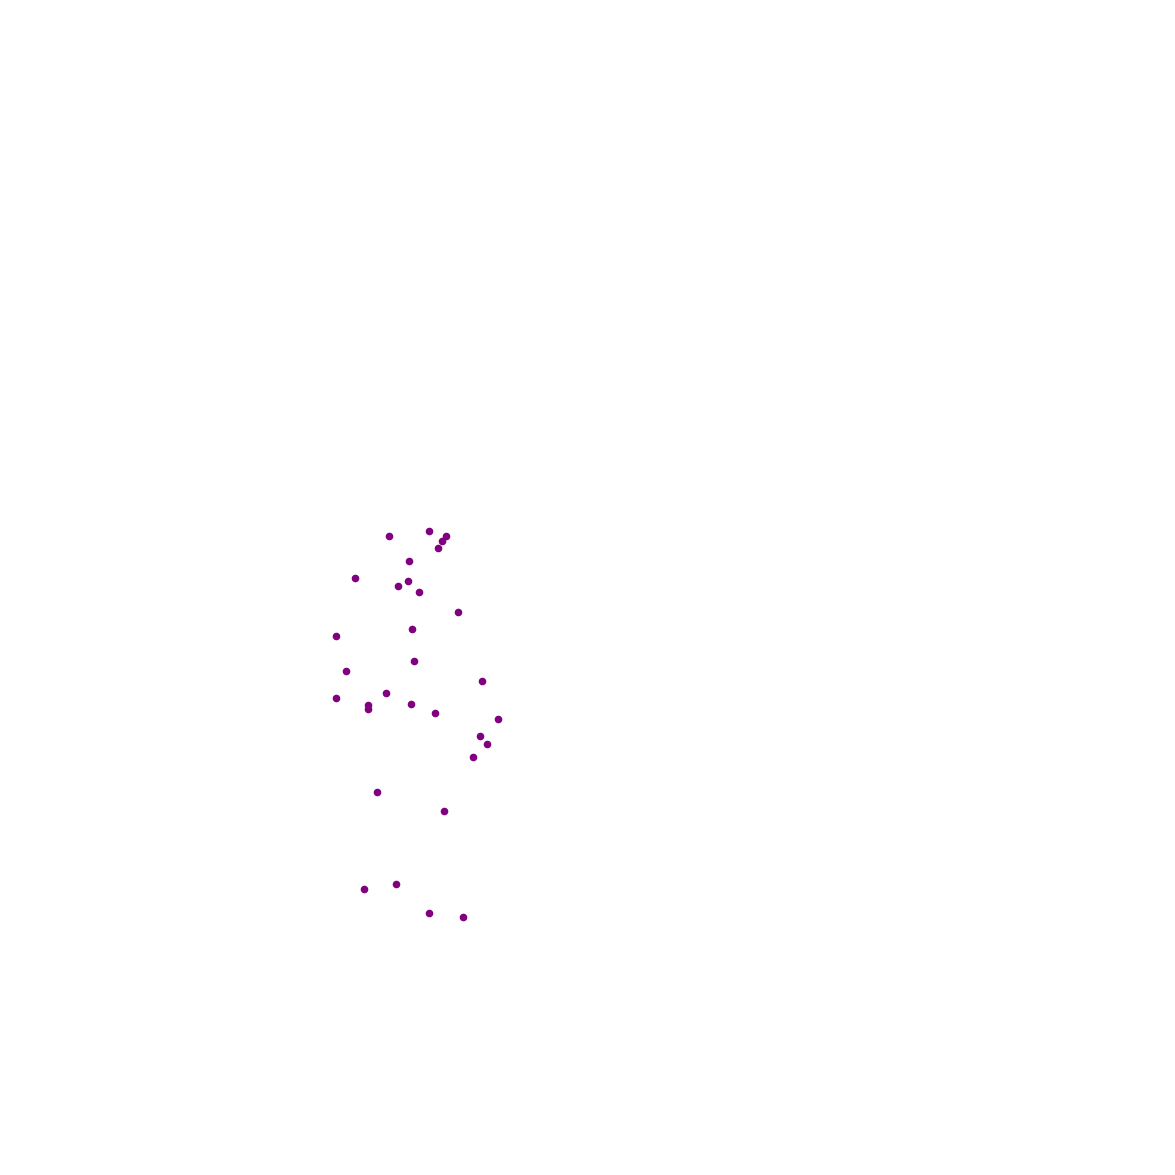

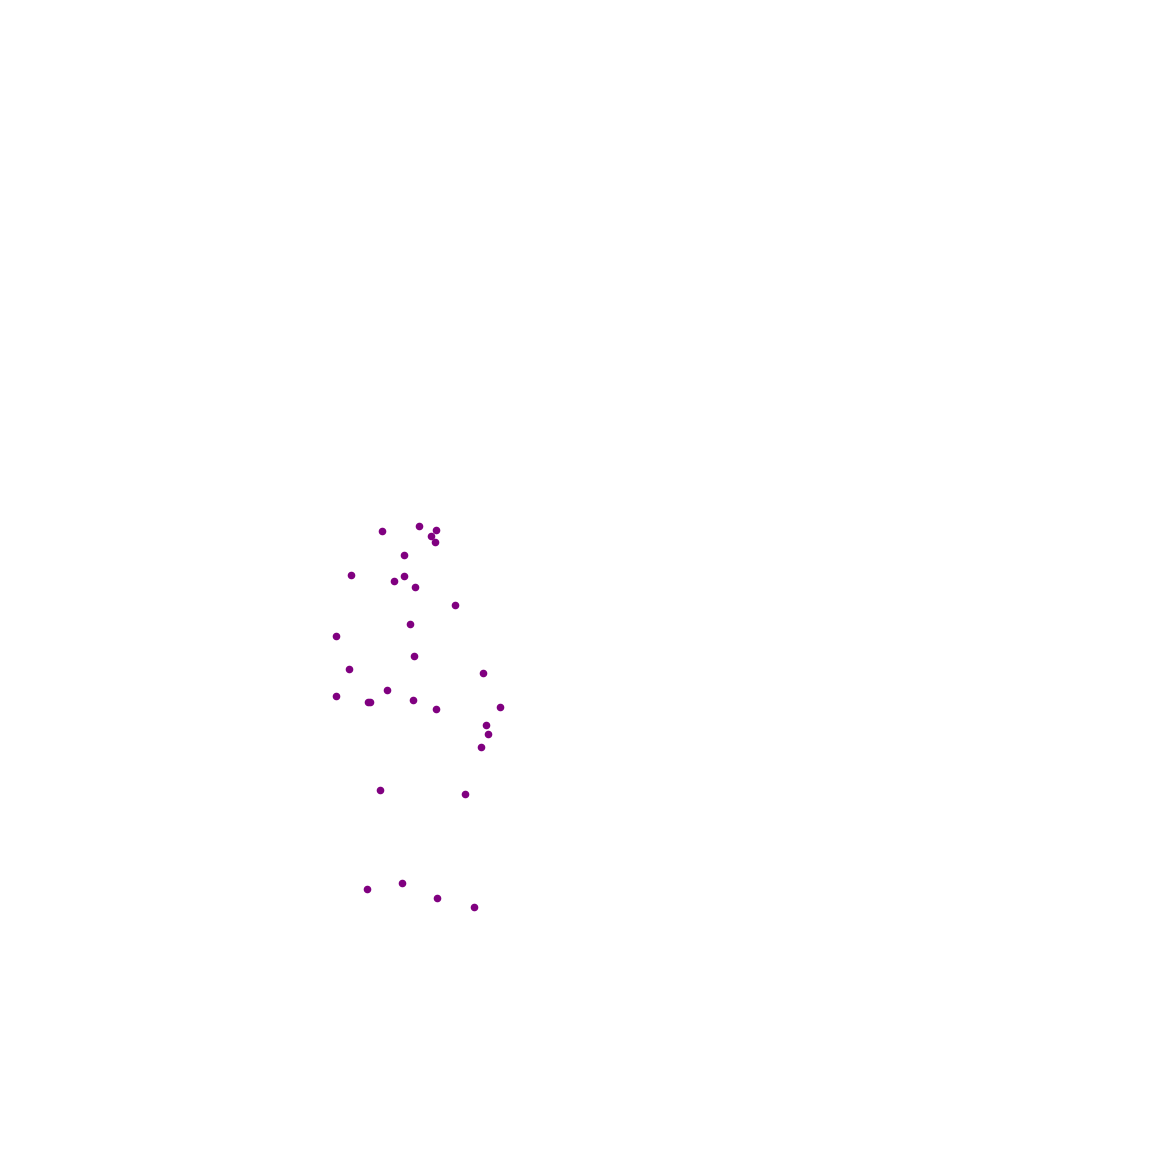

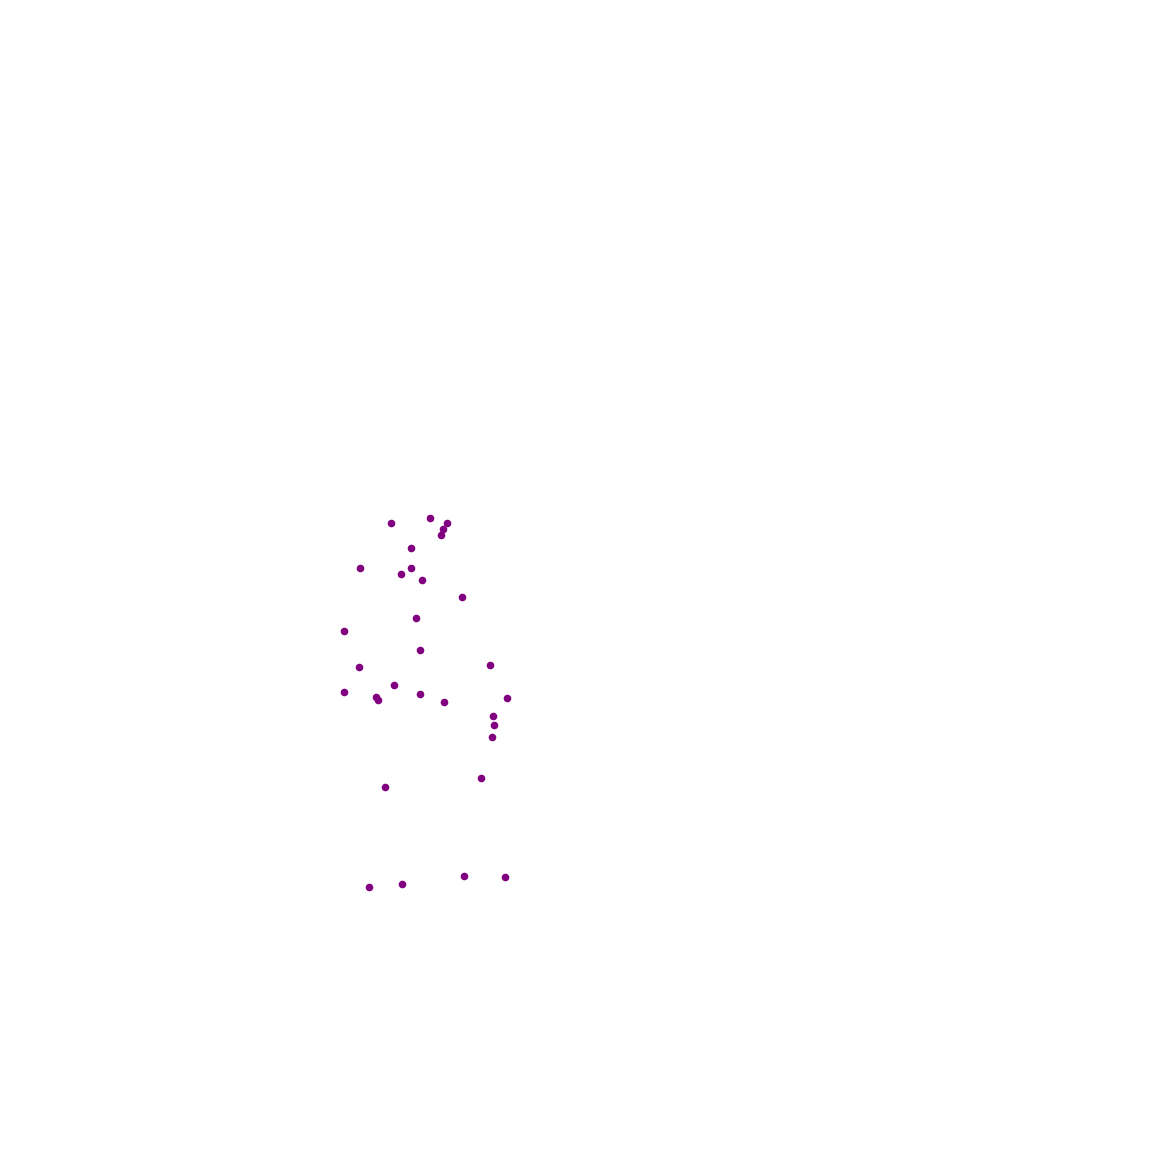

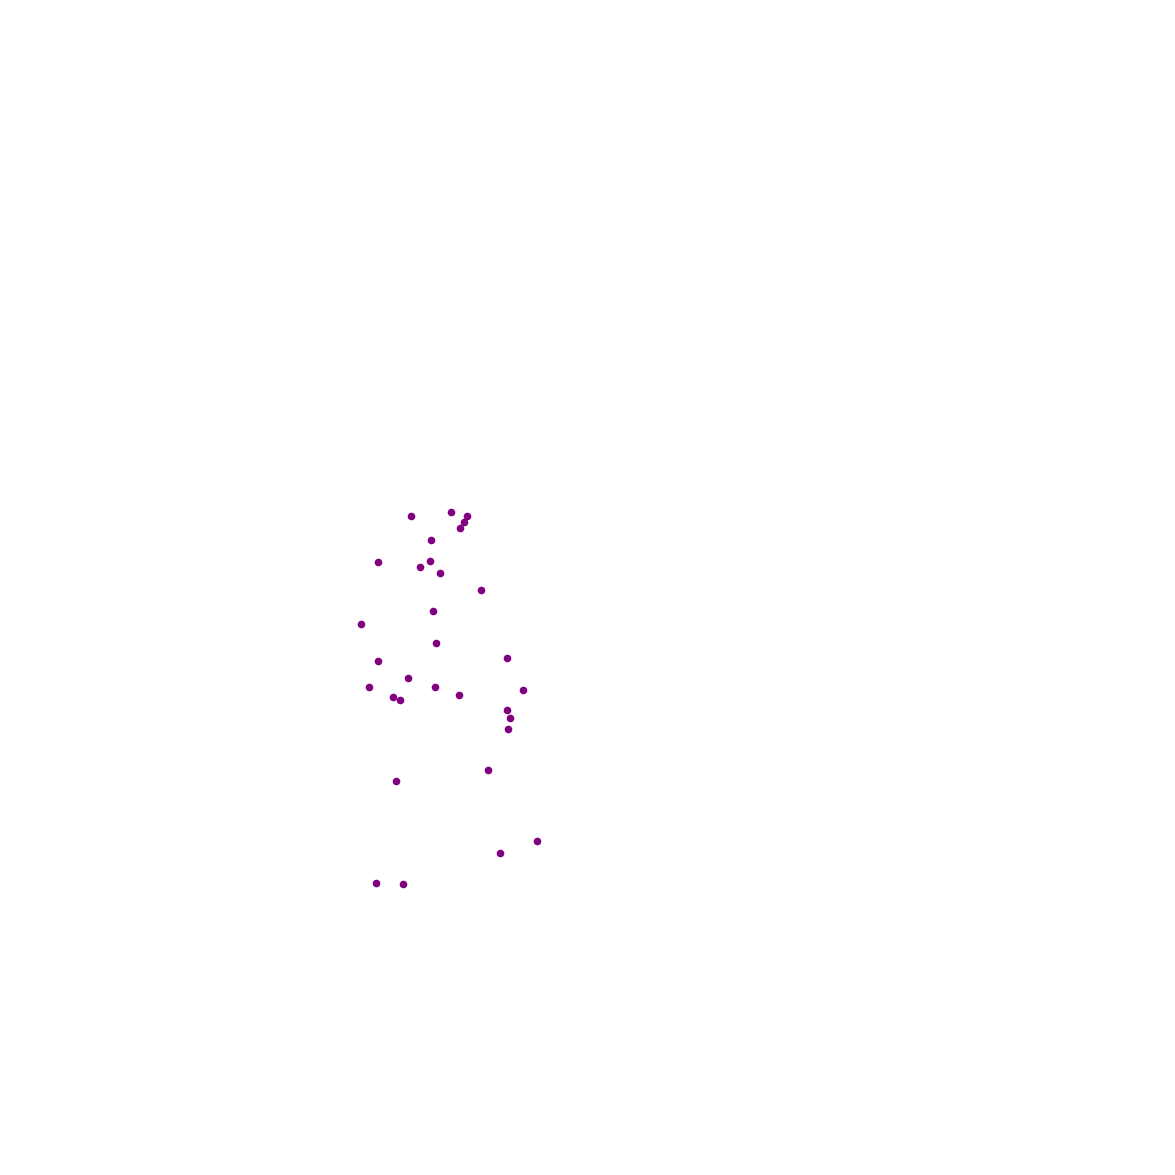

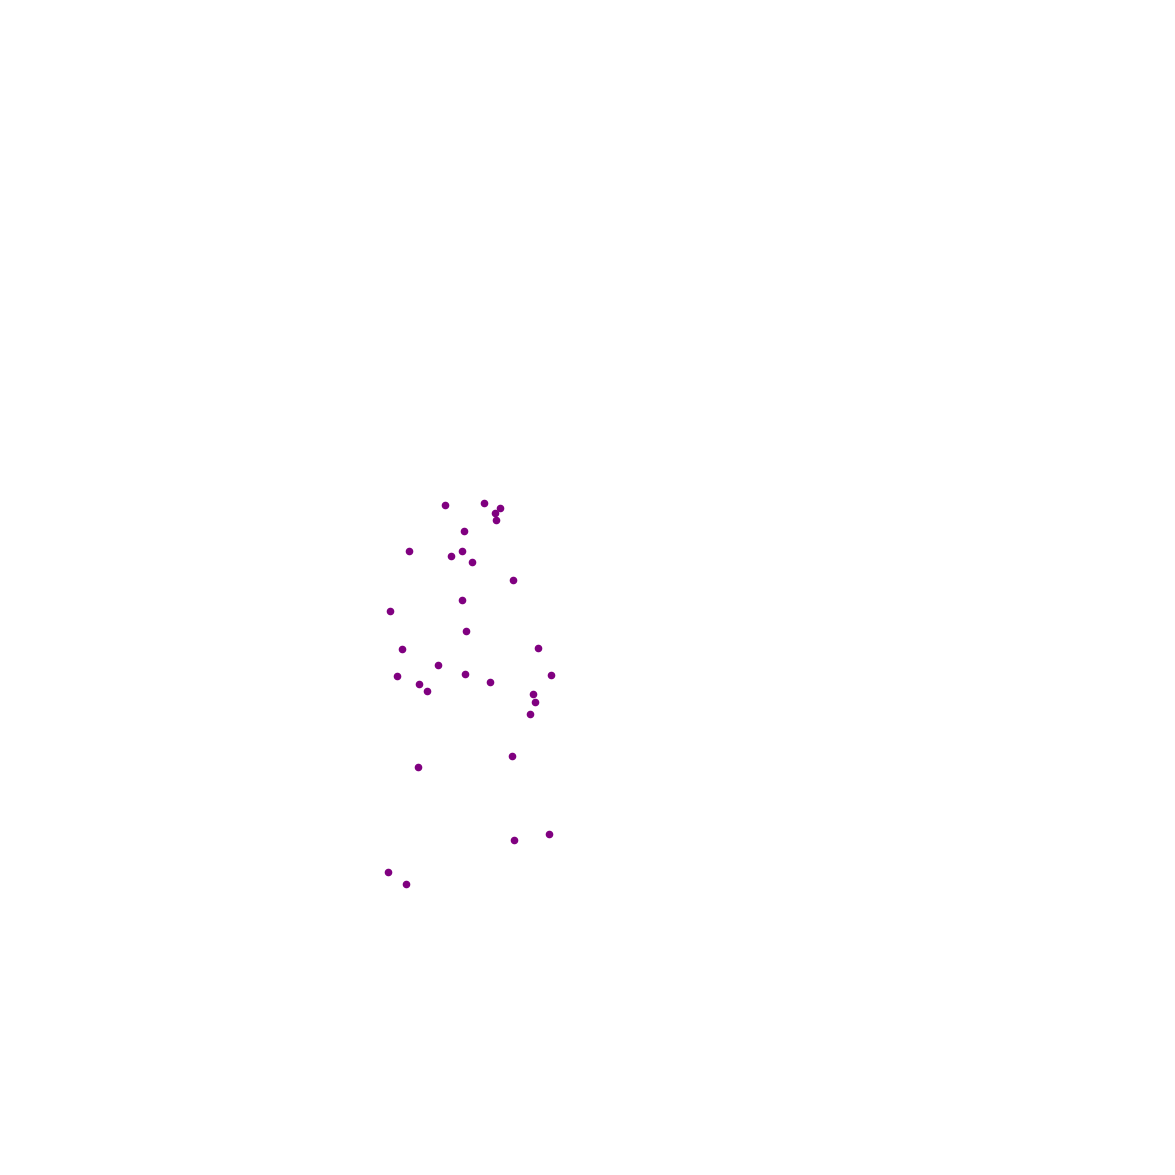

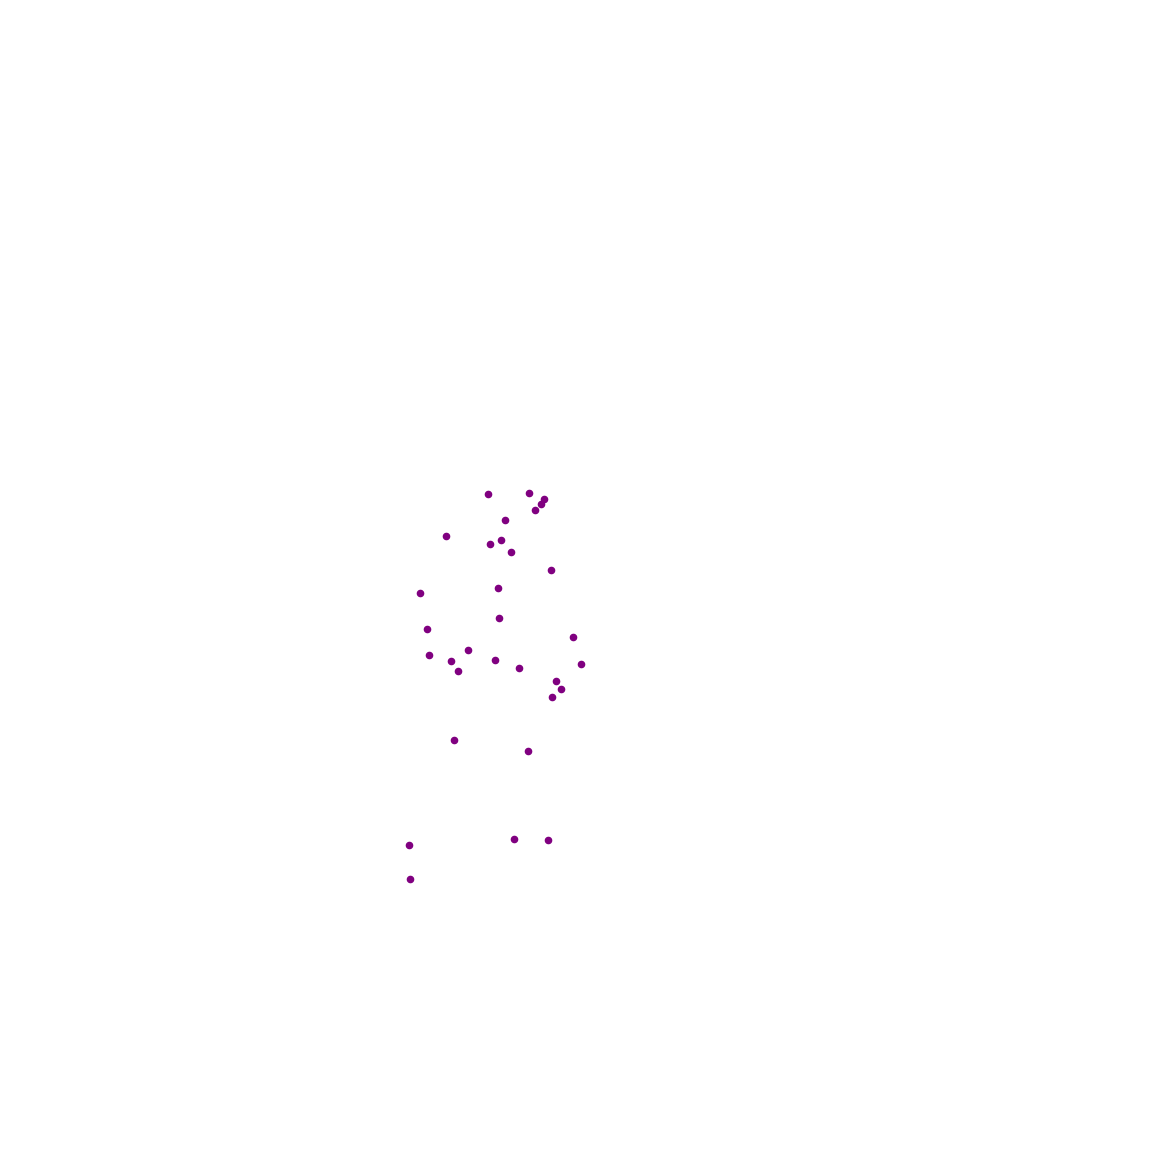

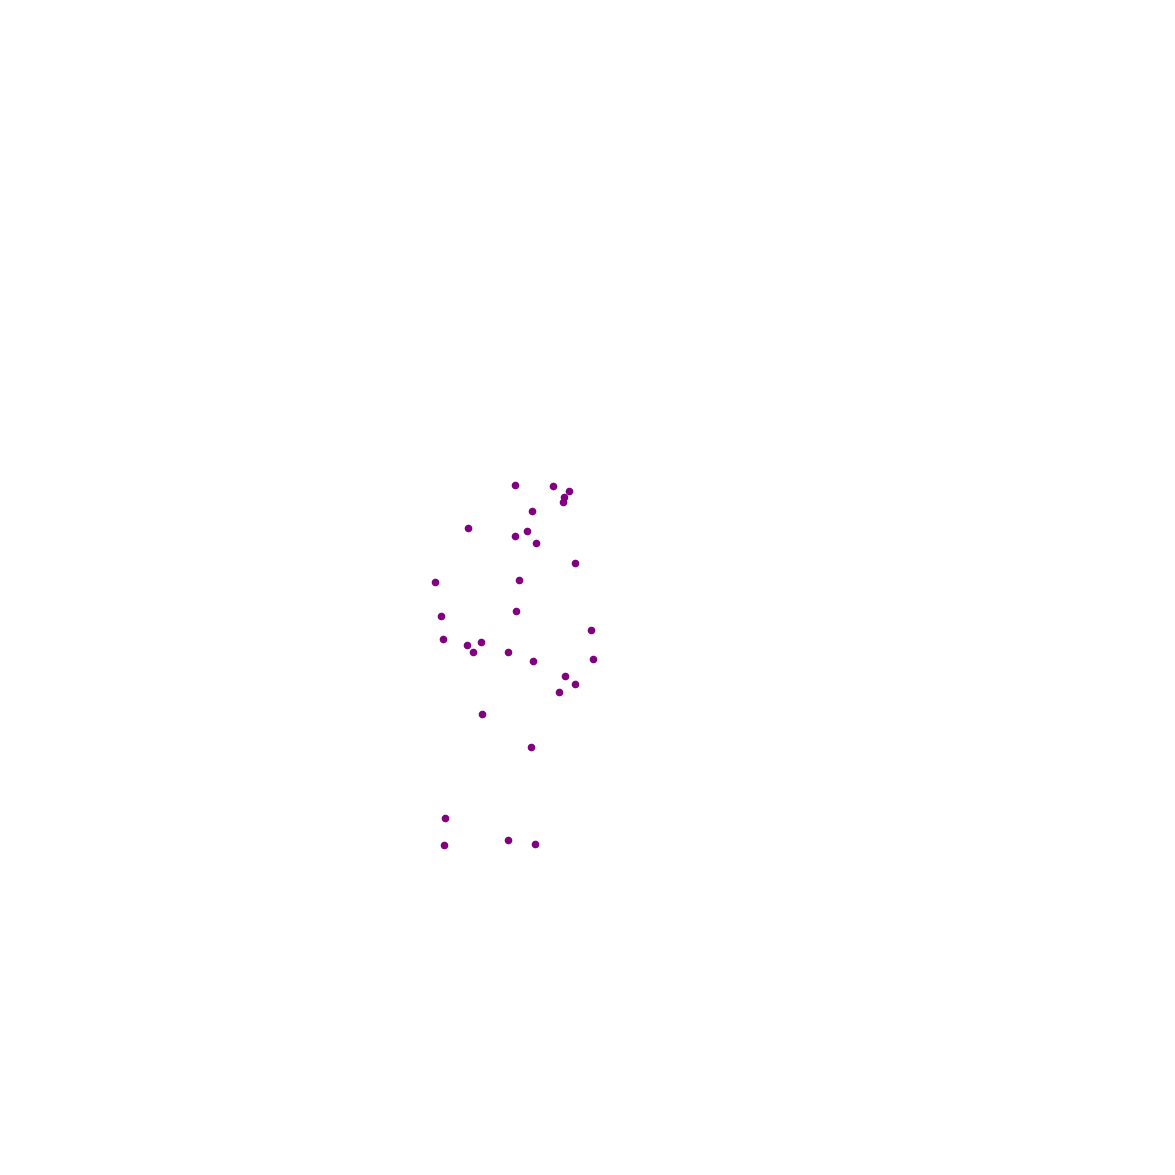

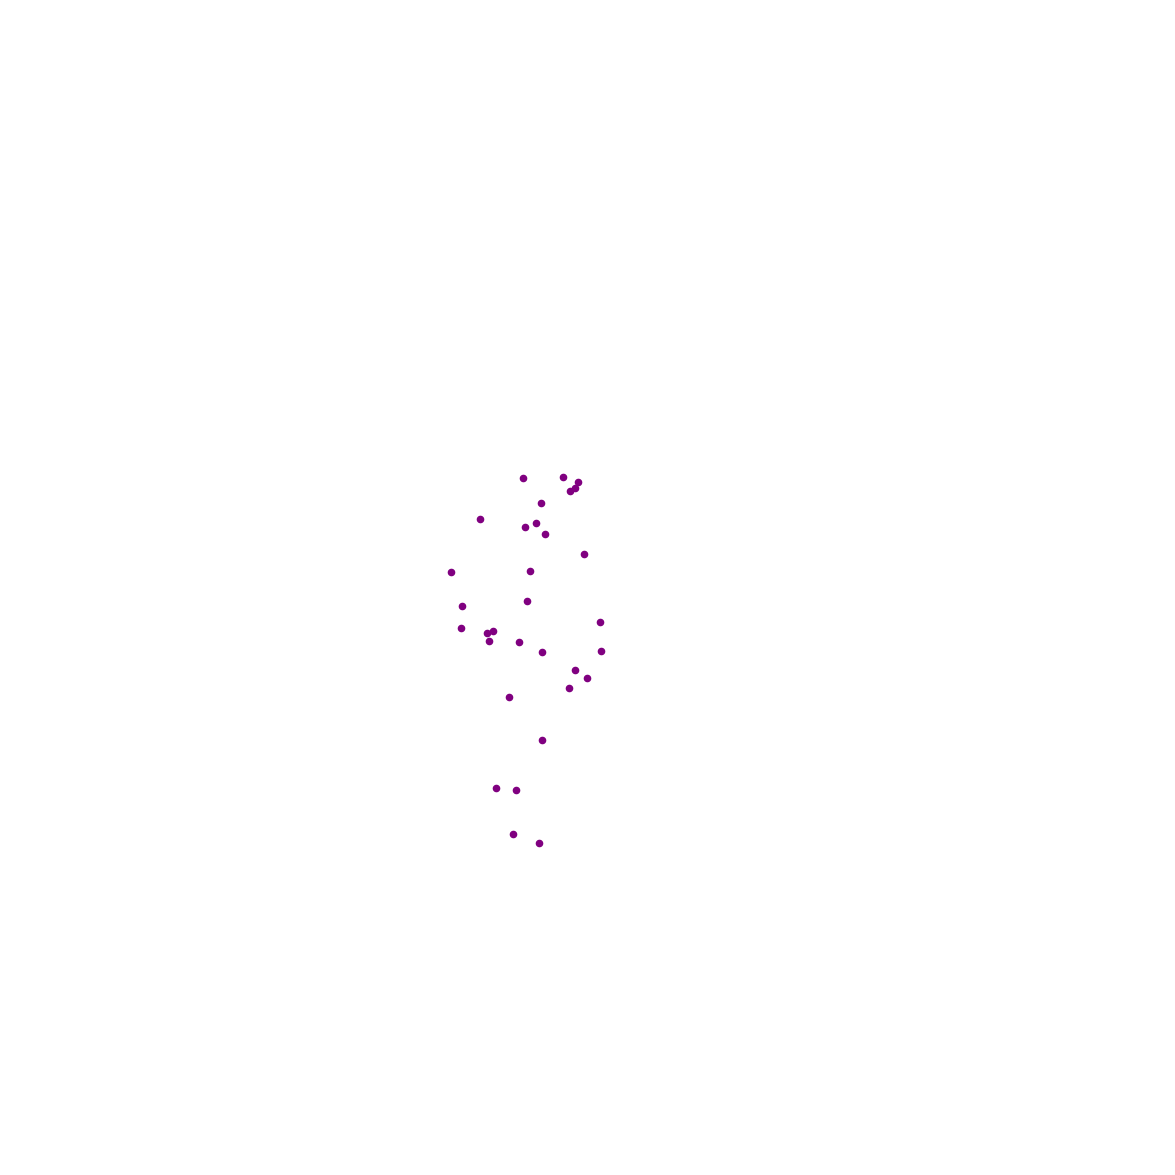

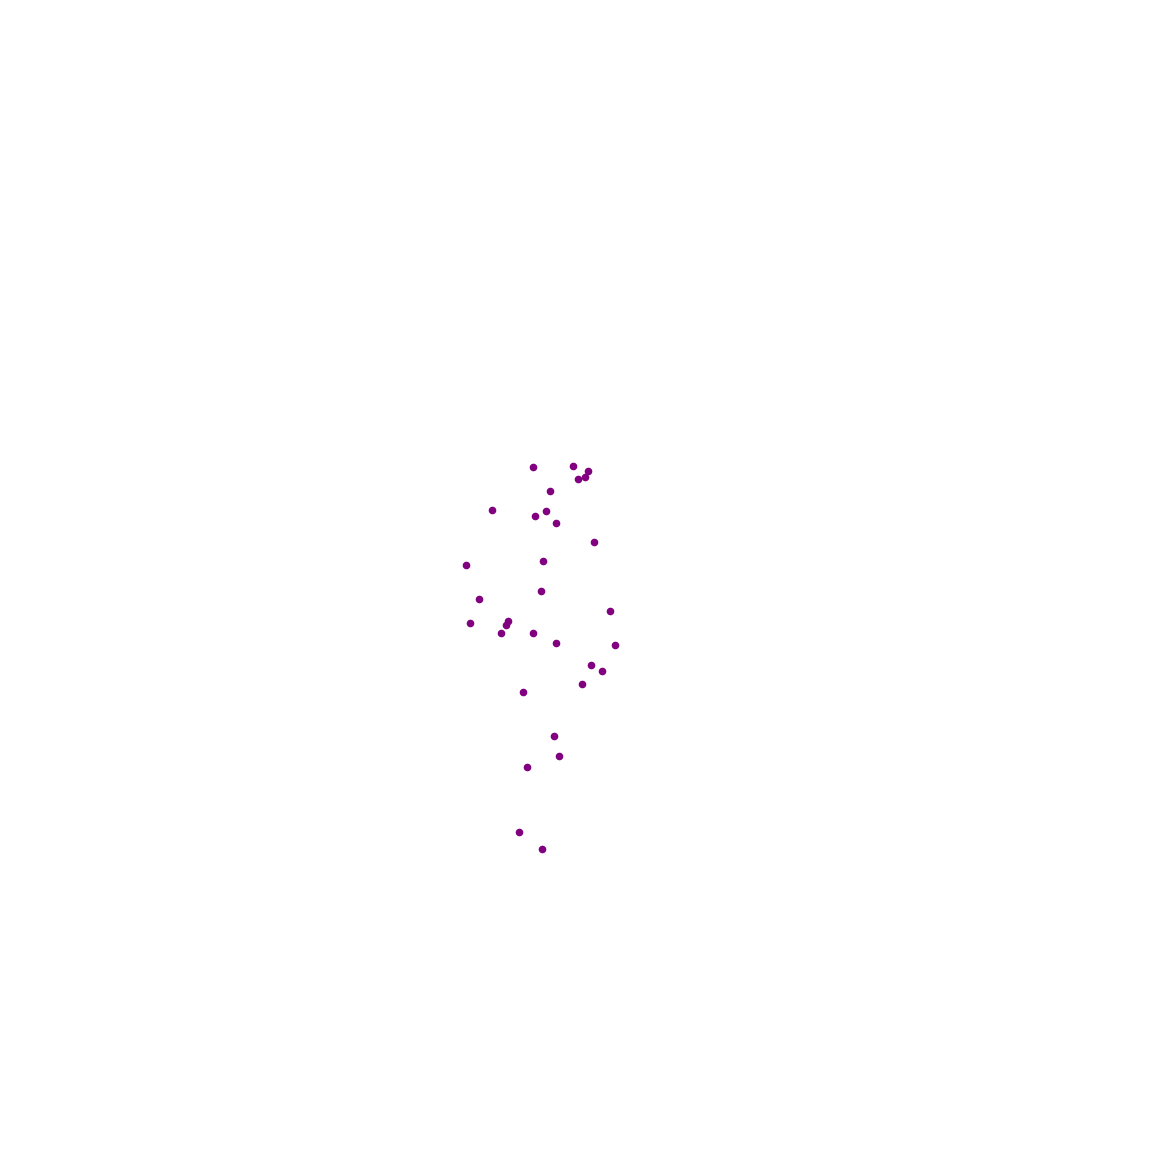

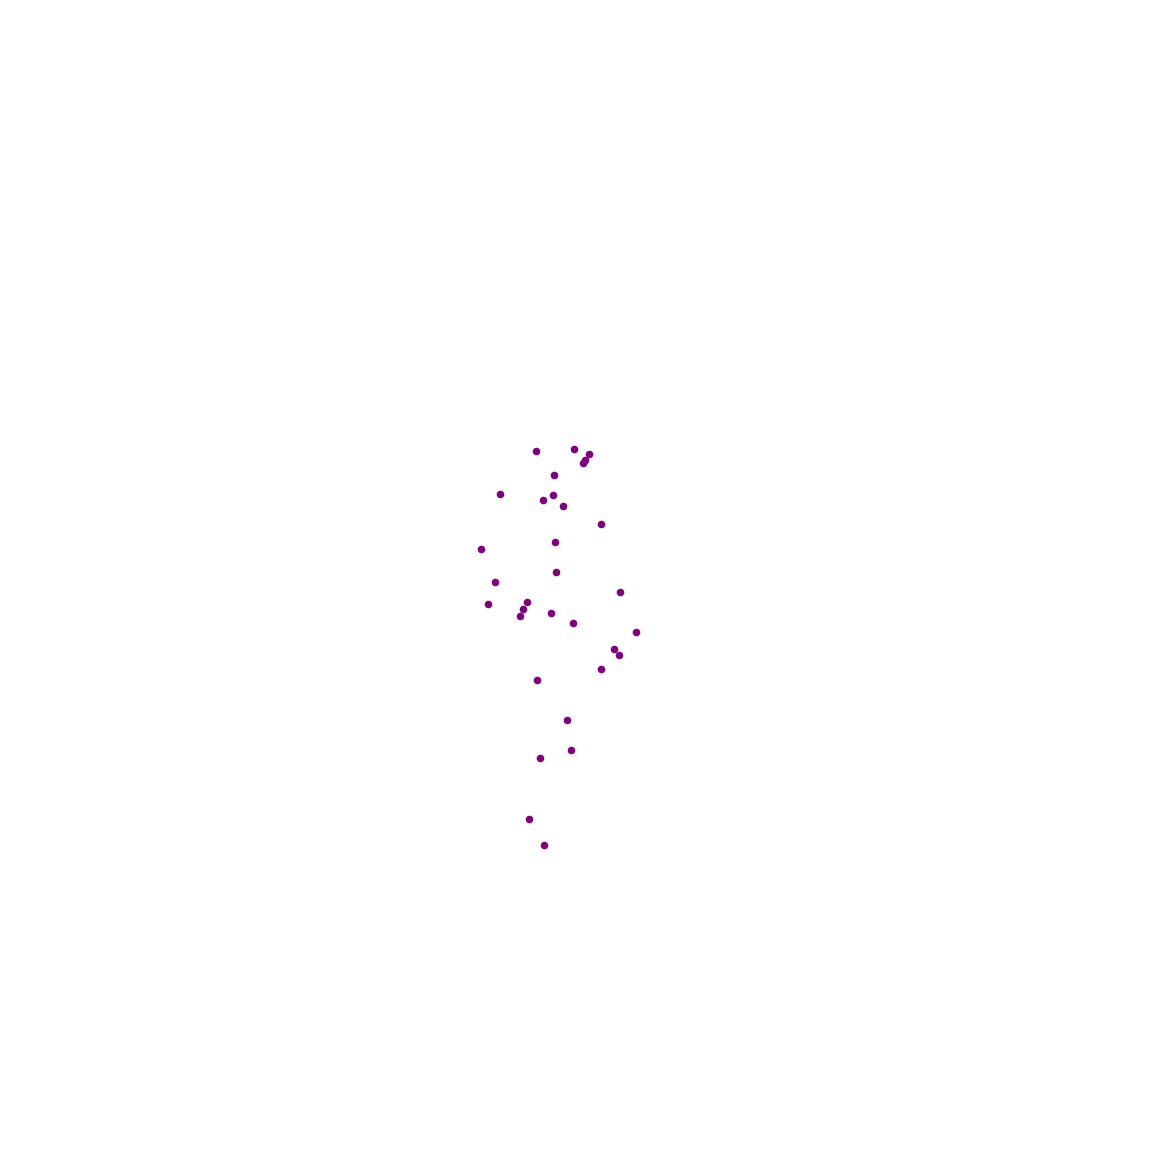

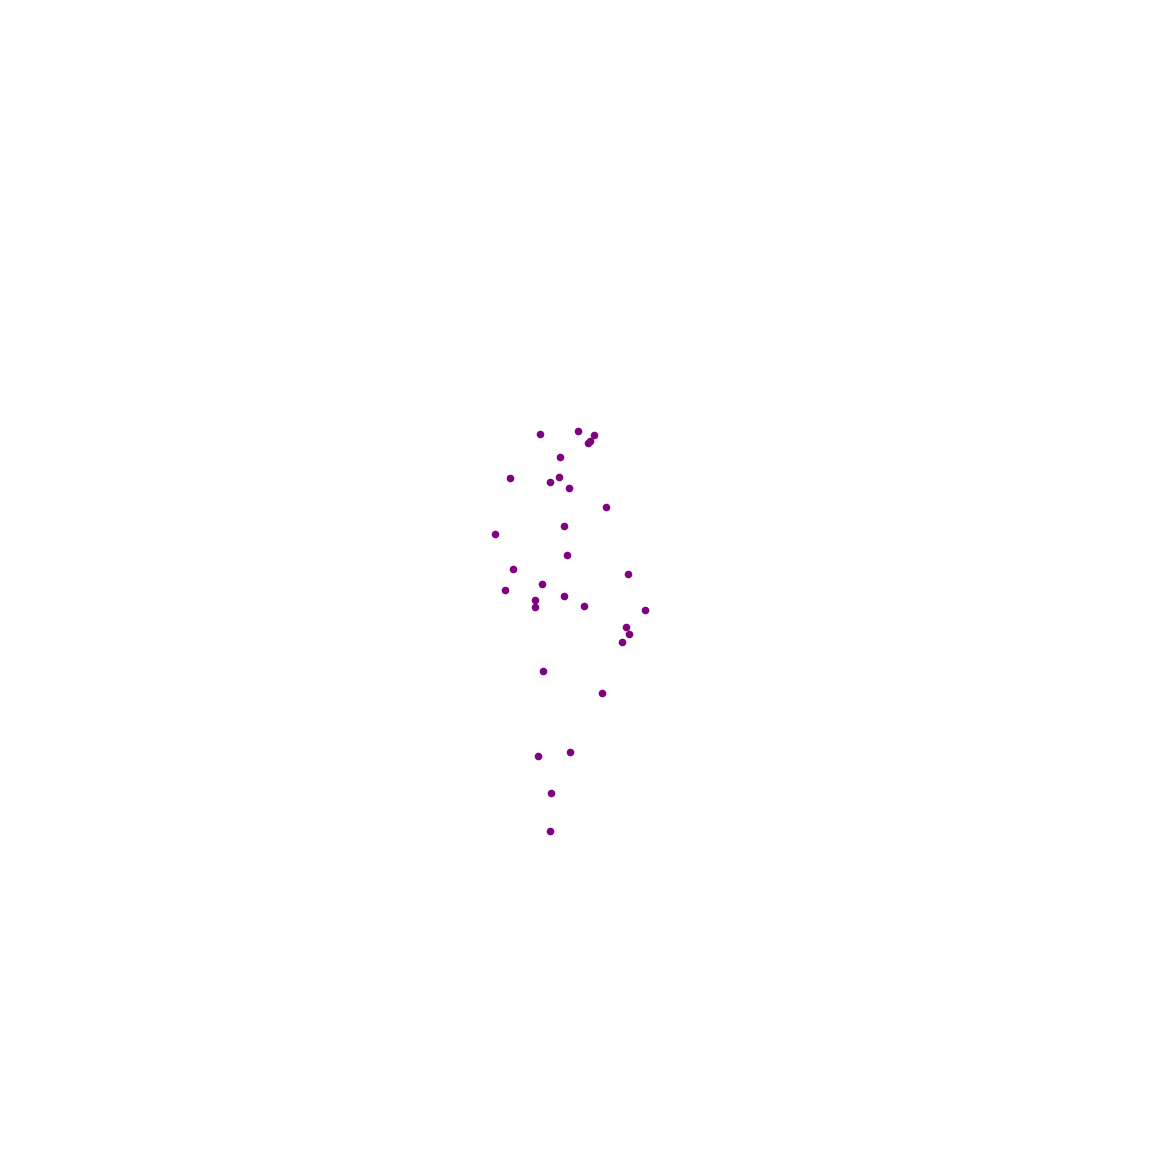

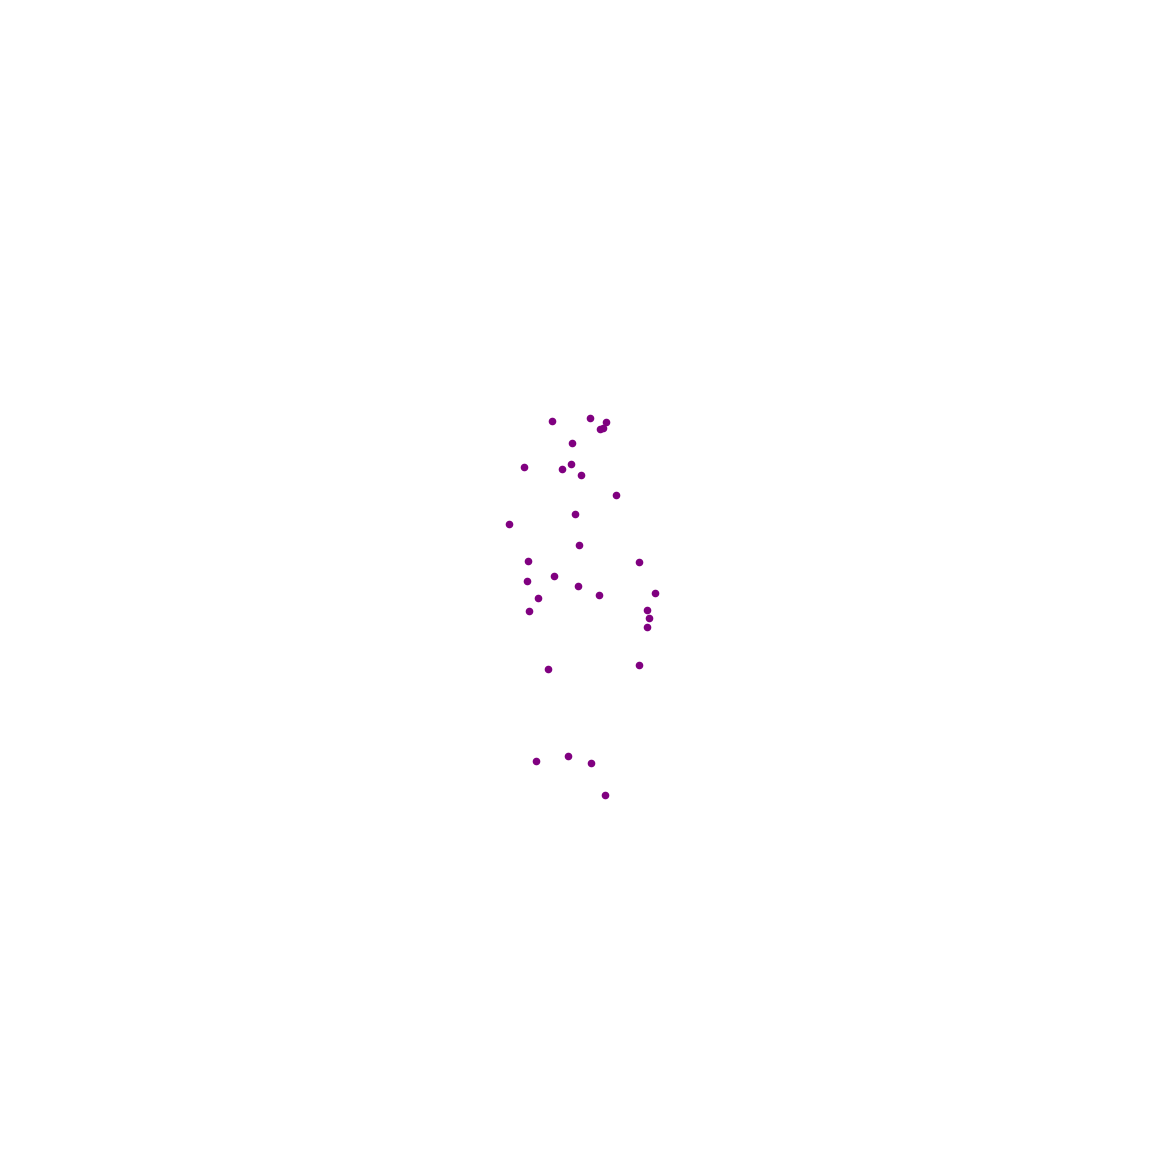

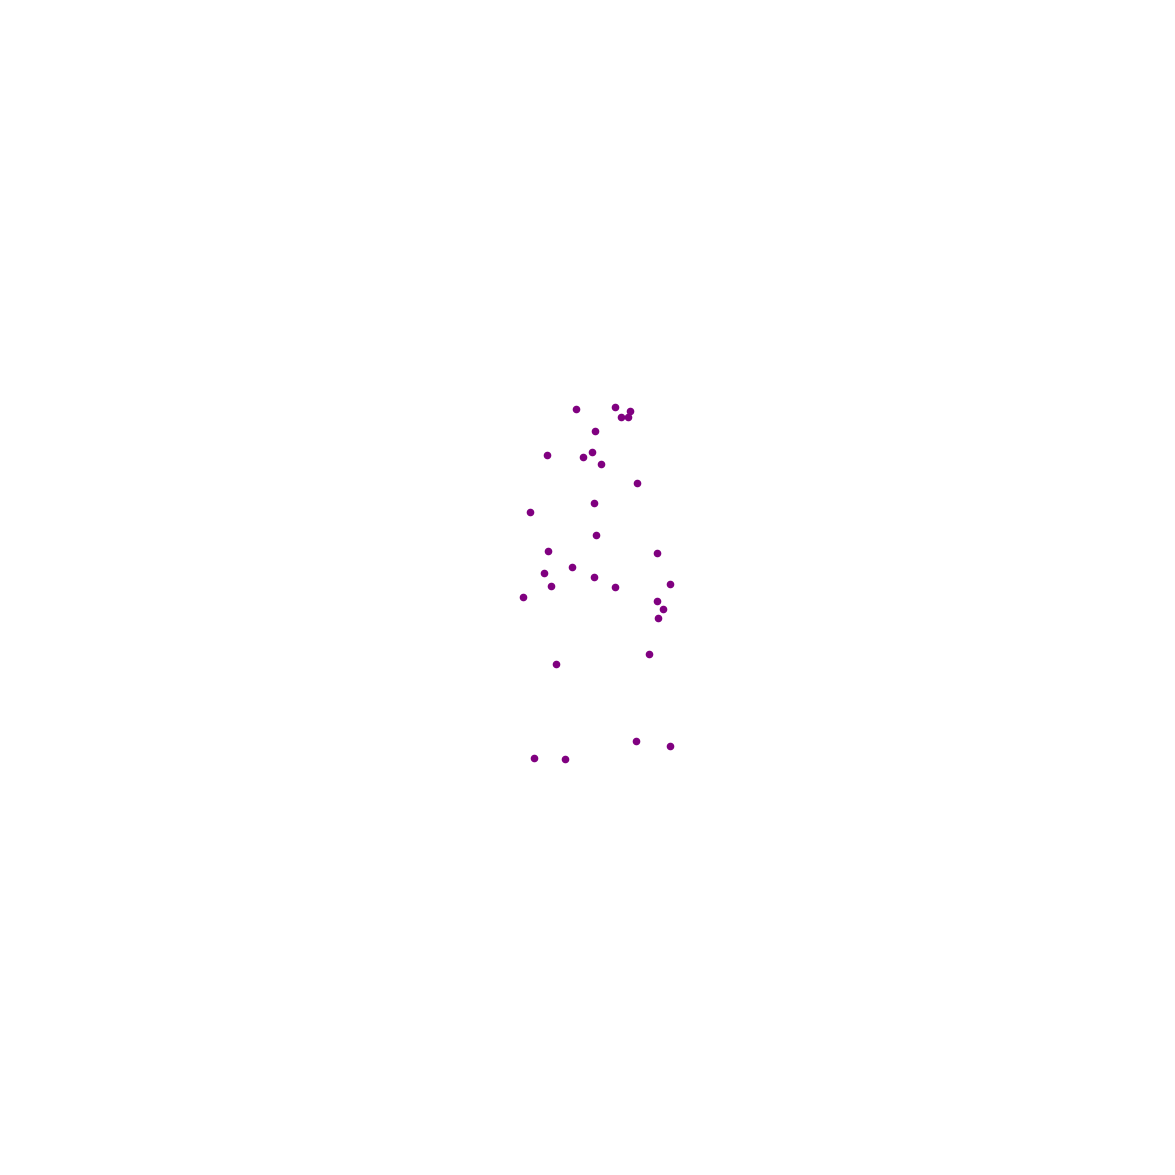

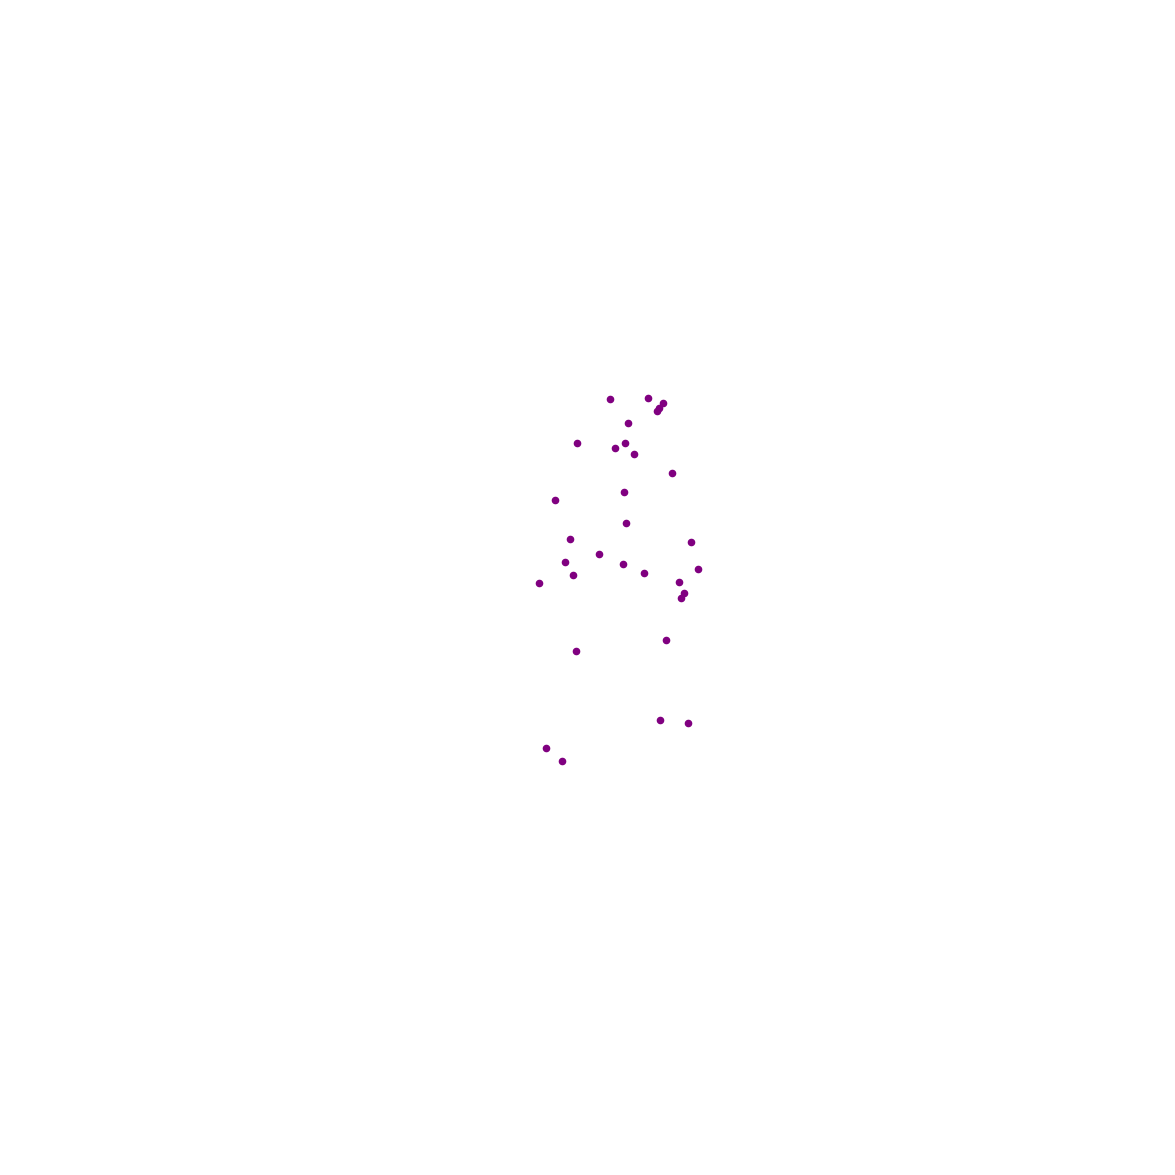

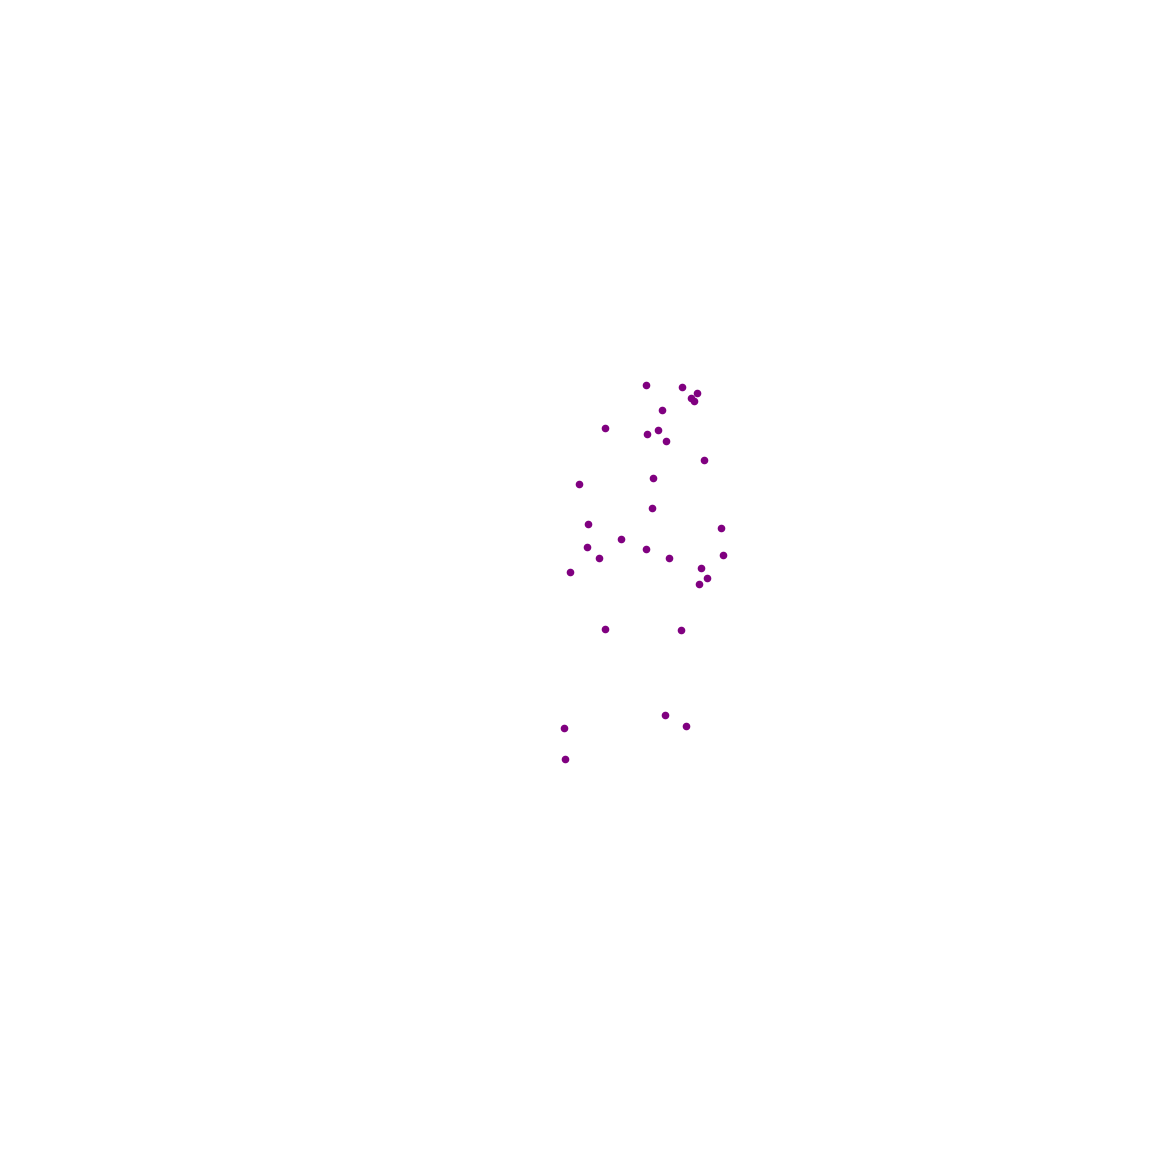

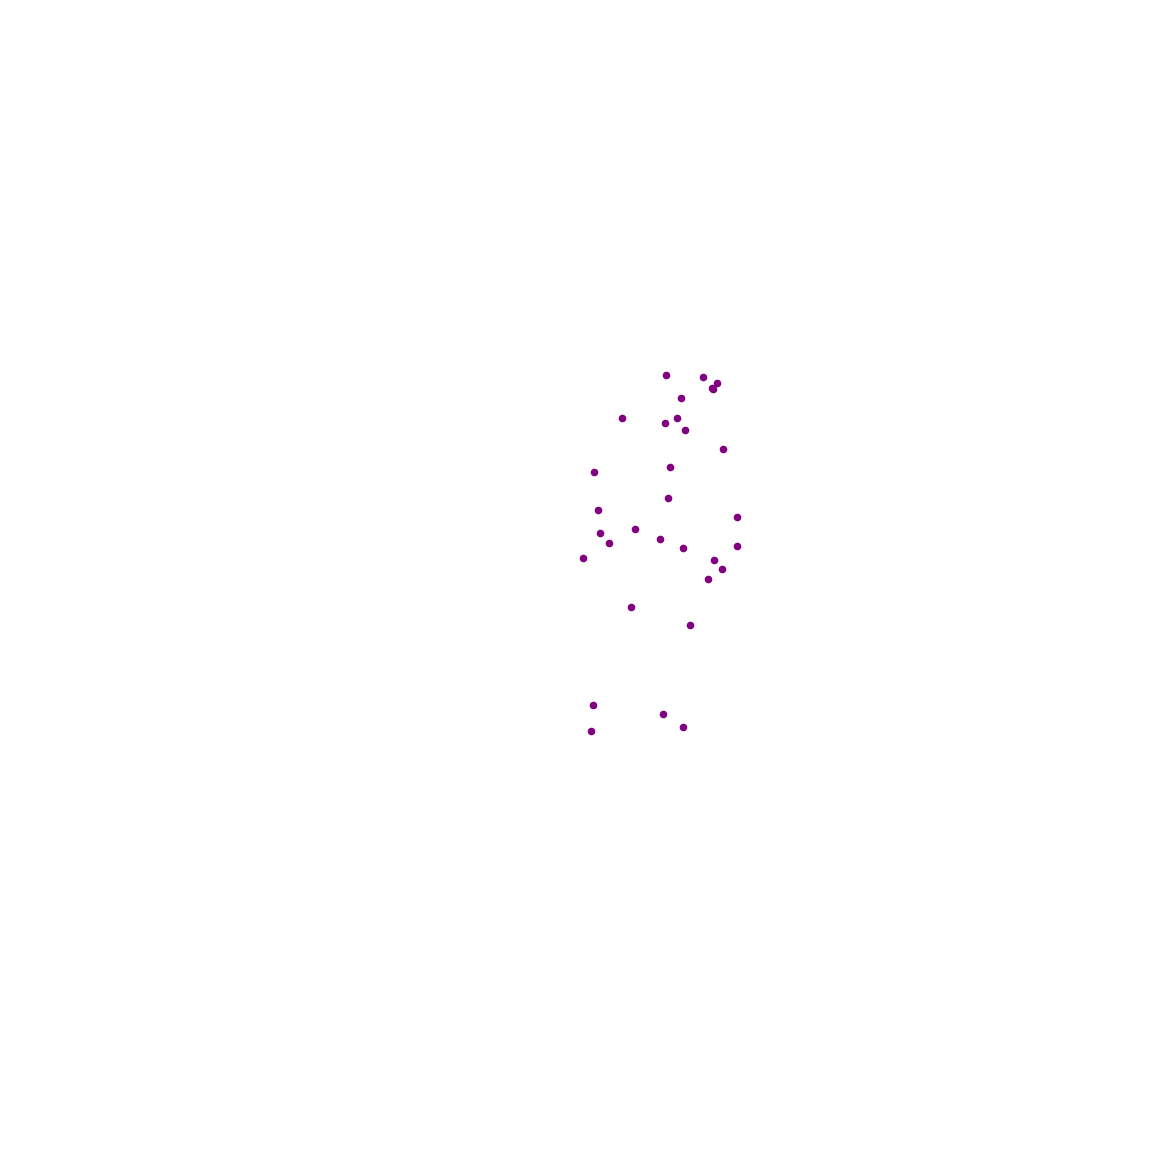

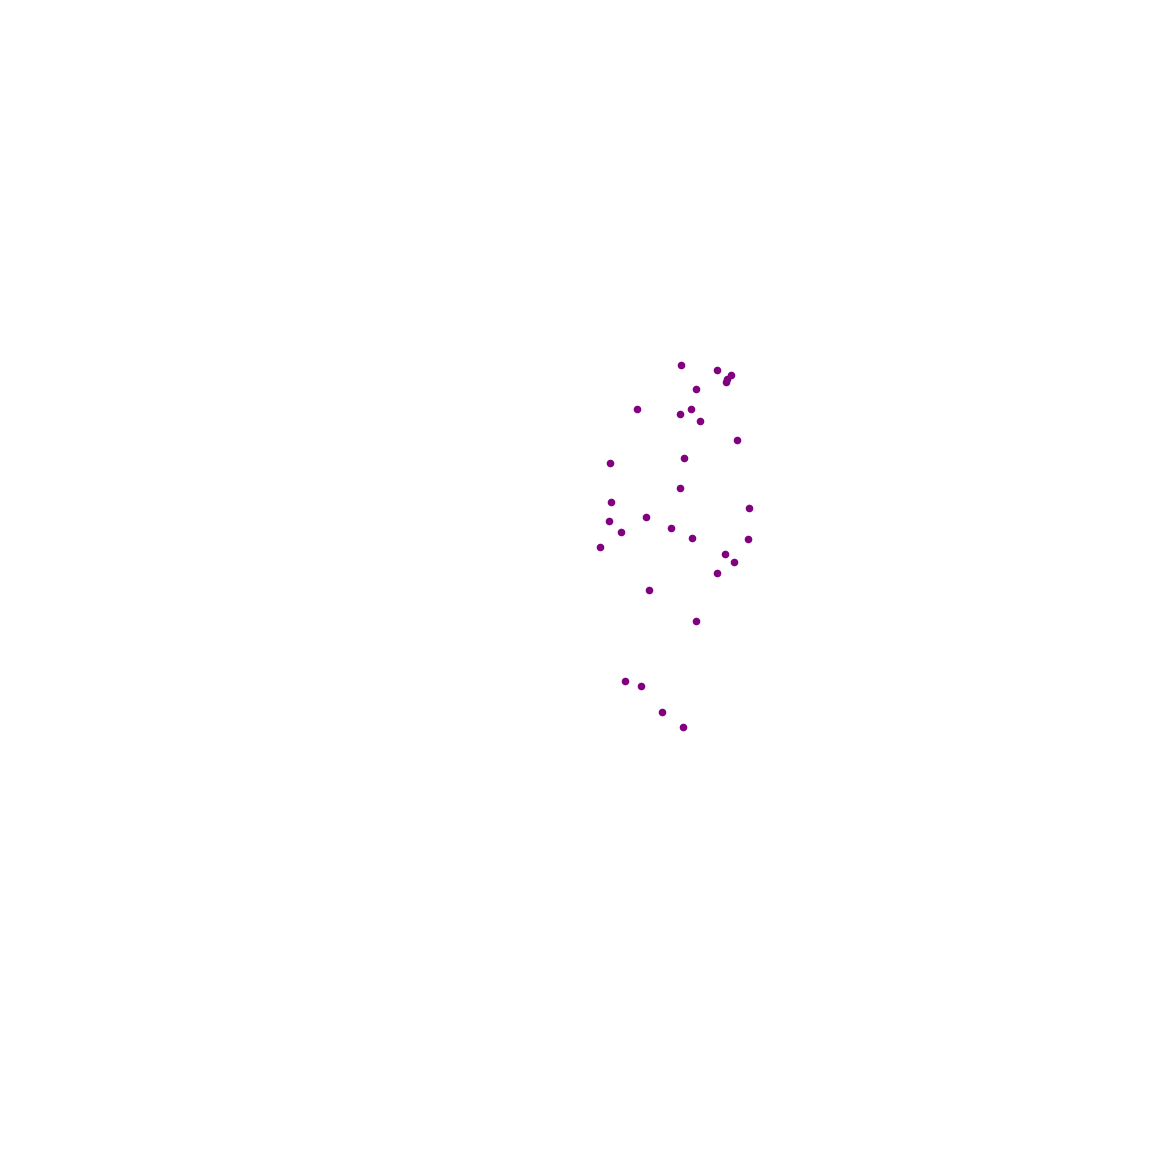

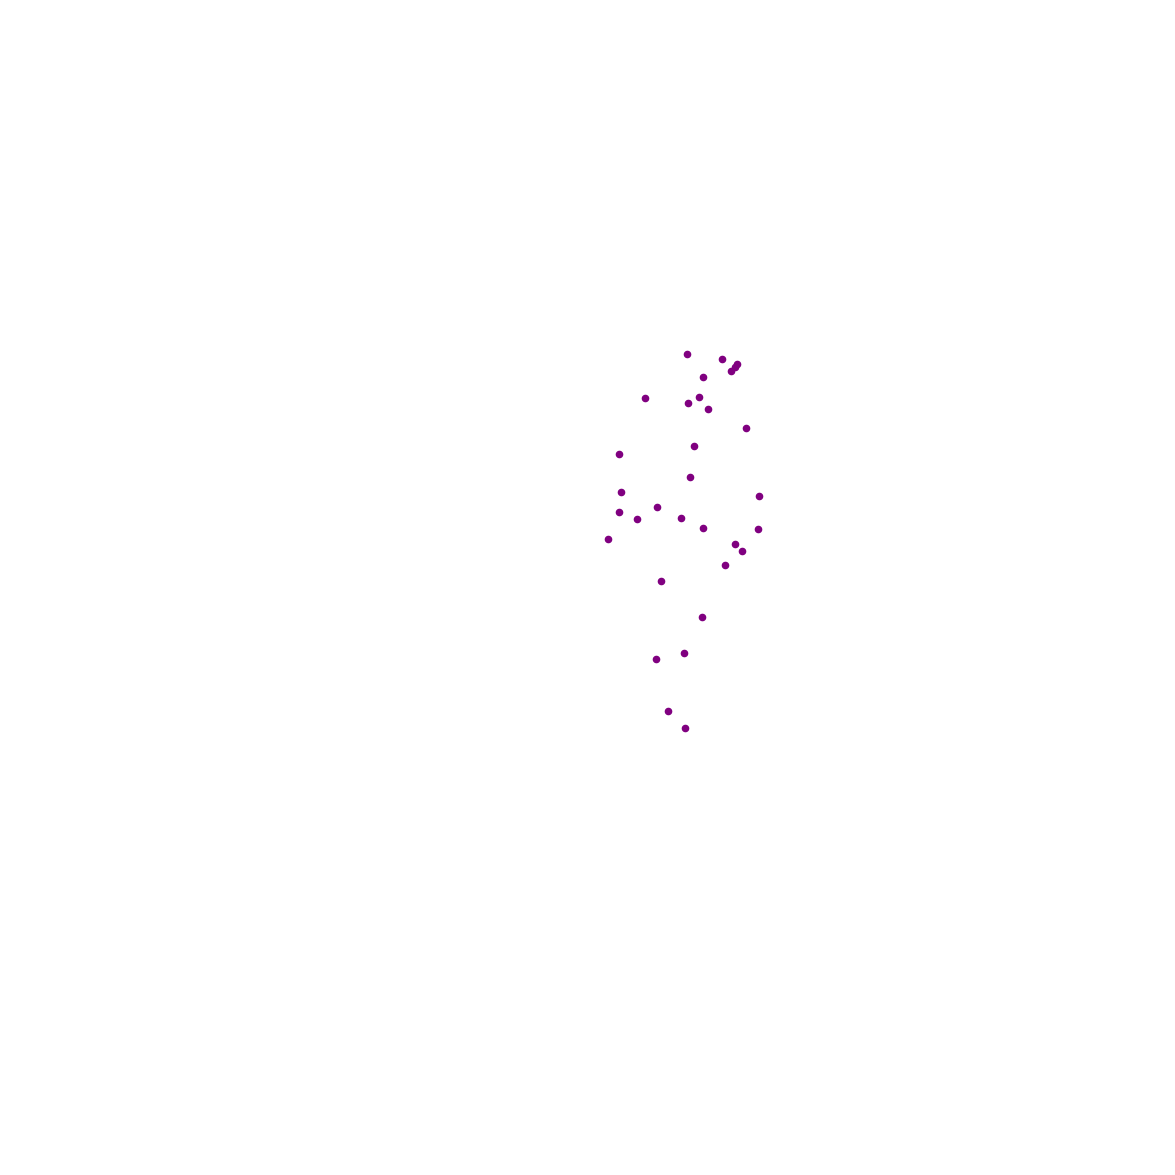

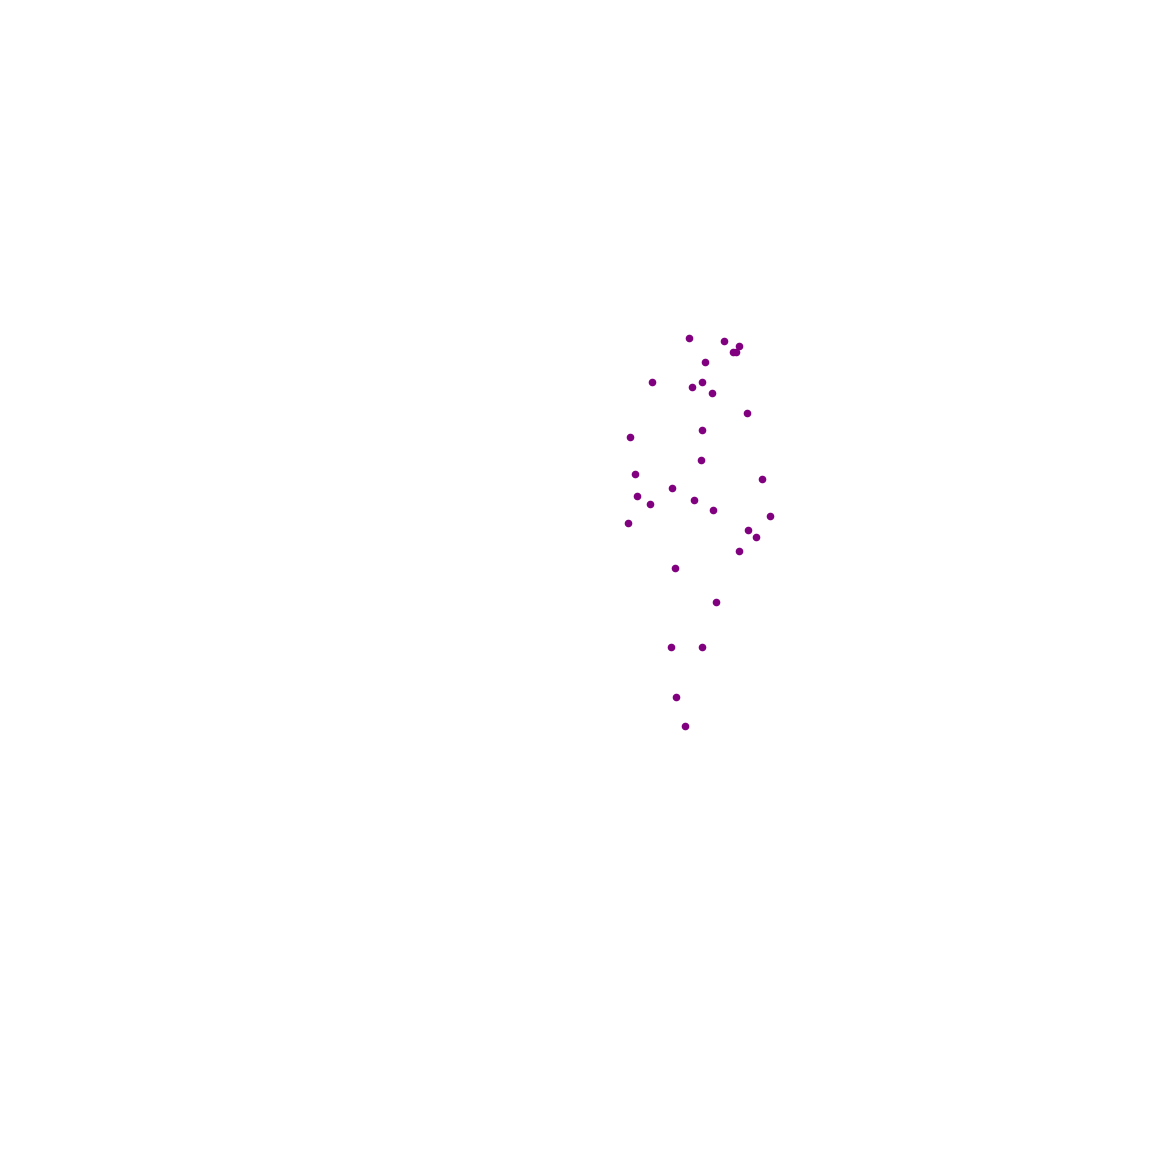

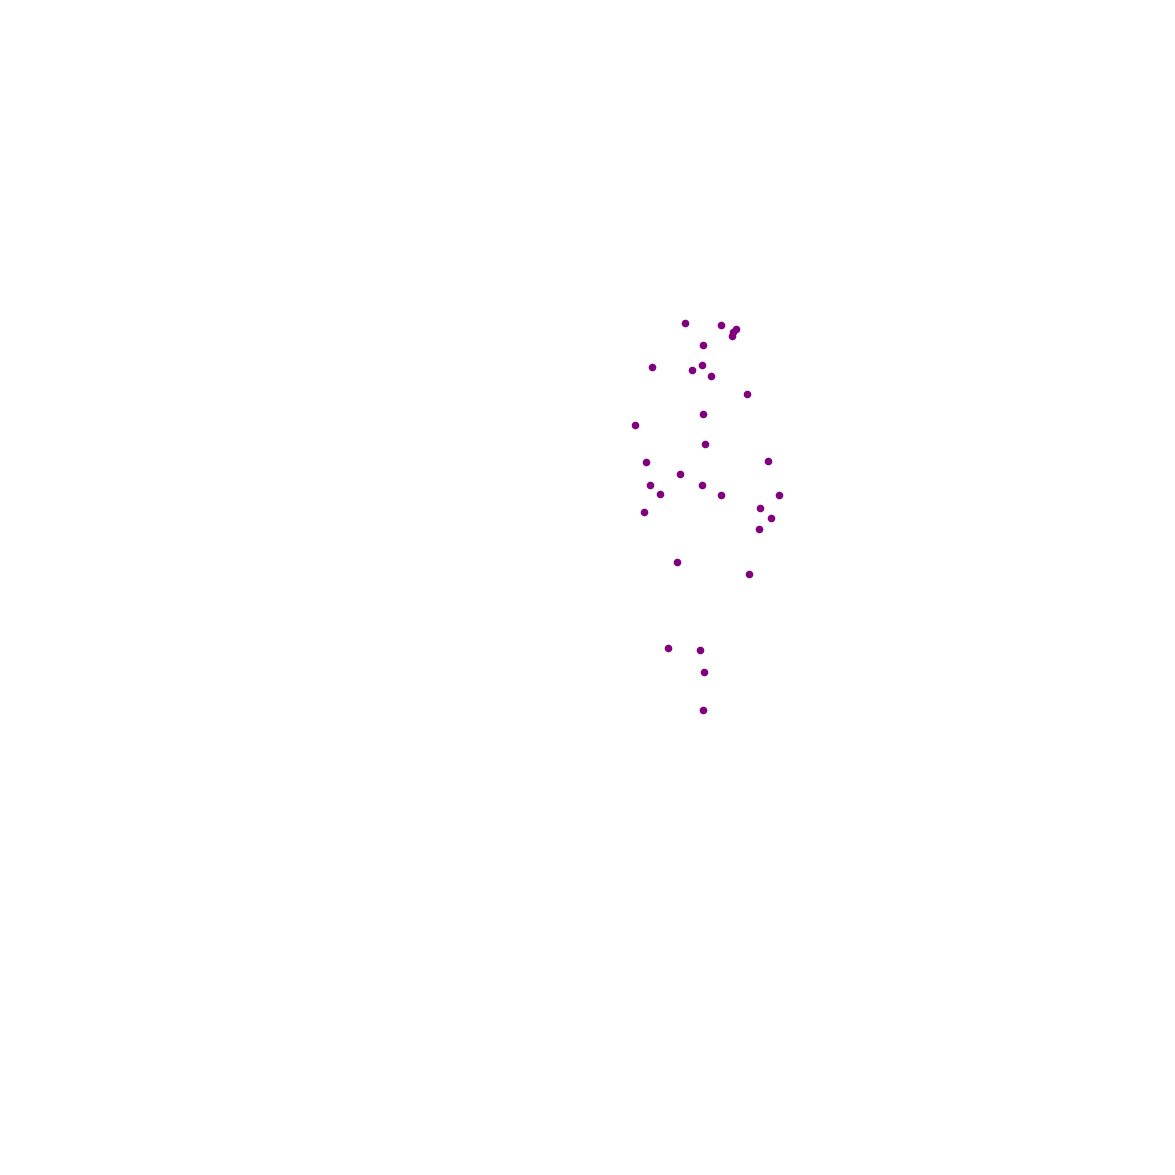

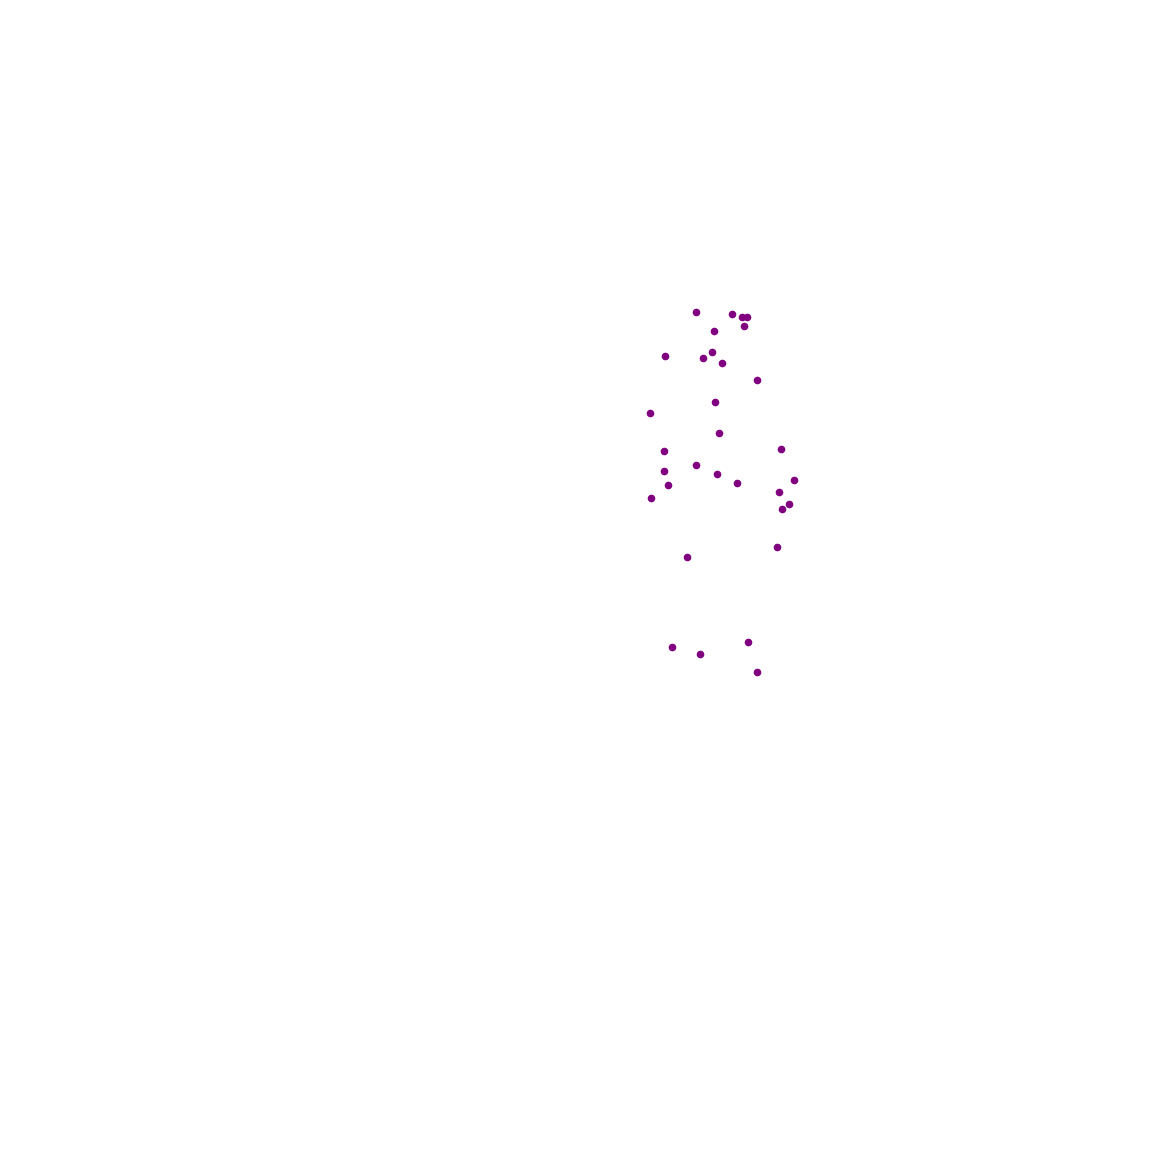

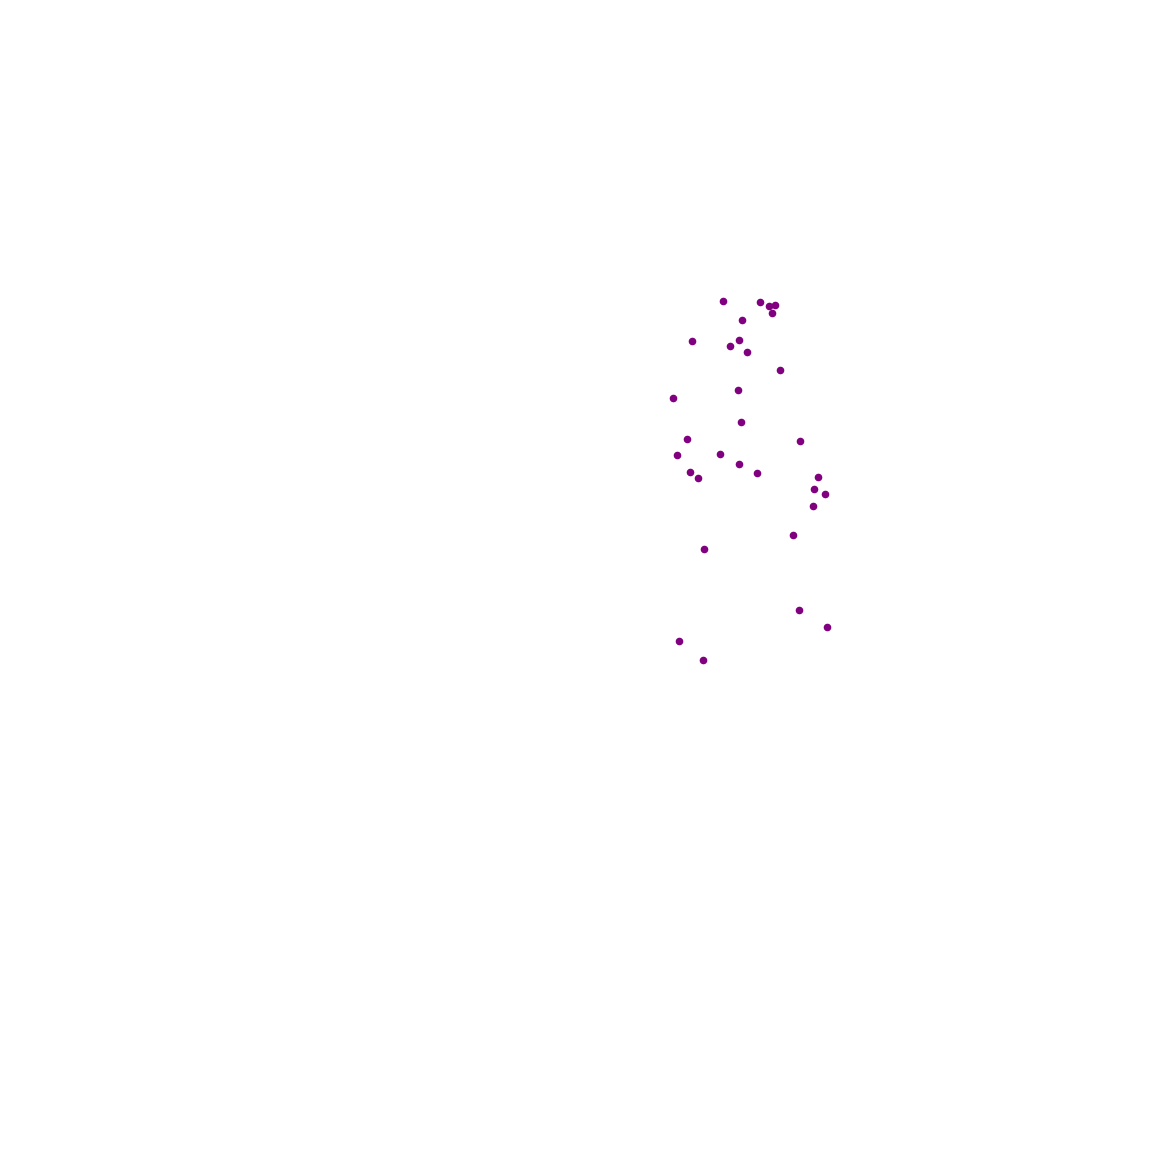

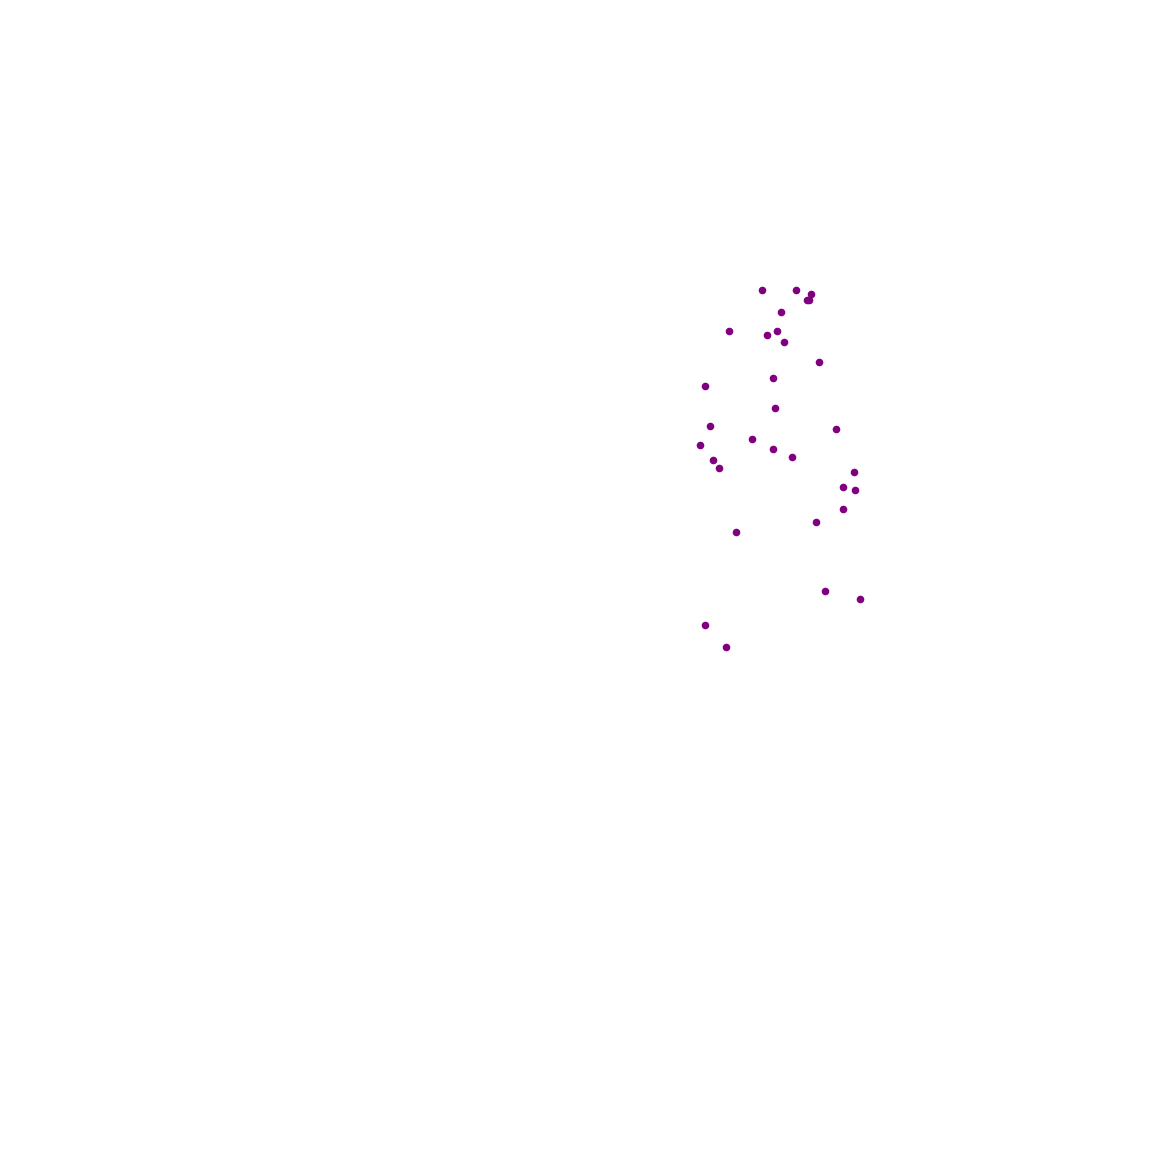

In [ ]:
#ax = plt.figure(figsize=(7.5,7.5)).add_subplot(projection='3d')

for j in range(0,full_kinect.shape[0],5):
  ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
  for l in range(0,96,3):
    ax.scatter(full_kinect[j,l],full_kinect[j,l+1], full_kinect[j,l+2], color = "purple")
    ax.set_xlim(-1,1)
    ax.set_ylim(0,2)
    ax.set_zlim(0.25,2.25)
    ax.set_axis_off()
  plt.show()

# Import test set & the best model

In [ ]:
X_test = np.load("/content/drive/MyDrive/Progetto_HDA/test_set.npy")
y_test = np.load("/content/drive/MyDrive/Progetto_HDA/y_test_set.npy")
#Load the model
path = "/content/drive/MyDrive/Progetto_HDA/models/model_lstm_ler"
model = tf.keras.models.load_model(path)

In [ ]:
left1 = [i for i in range(12,33)]
left2 = [i for i in range(54,66)]
left3 = [i for i in range(84,90)]

mid = [i for i in range(12)]+[i for i in range(78,84)]

right1 = [i for i in range(33,54)]
right2 = [i for i in range(66,78)]
right3 = [i for i in range(90,96)]

features = left1 + left2 + left3 + right1 + right2 + right3
response_malattie = {"antalgic":1,"lurching":2,"normal":3,"steppage":4,"stiff-legged":5,"trendelenburg":6}
malattie = dict(zip(response_malattie.values(),response_malattie.keys()))

In [ ]:
time_start = time.time()
pred = np.argmax(model.predict(X_test[:,:,features]),axis=1)
end = datetime.timedelta(seconds=(time.time()-time_start))

print(f"\nTo predict {len(y_test)} observation the model takes {float([float(i) for i in str(end).split(':')[1:3]][1])} second")

12/12 [==============================] - 5s 320ms/step

To predict 360 observation the model takes 5.849956 second


In [ ]:
print("EXAMPLE OF PREDICTION:")
print("\n")
for j in range(1,5):
  np.random.seed(j**2+19)


  obs = random.randint(1, len(y_test)-1)

  print(f"We try to predict the observation number {obs} of the test set.\n")
  print(f"The true class is {malattie[np.argmax(y_test[obs])+1]}\n")
  pred_ = pred[obs]
  print(f"The predicted class is {malattie[pred_+1]}\n")
  print("\n")

EXAMPLE OF PREDICTION:


We try to predict the observation number 356 of the test set.

The true class is antalgic

The predicted class is antalgic



We try to predict the observation number 179 of the test set.

The true class is trendelenburg

The predicted class is trendelenburg



We try to predict the observation number 71 of the test set.

The true class is normal

The predicted class is normal



We try to predict the observation number 72 of the test set.

The true class is normal

The predicted class is normal





=========================== Test set accuracy ===========================

0.9333333333333333

======================= Test set Confusion Matrix =======================



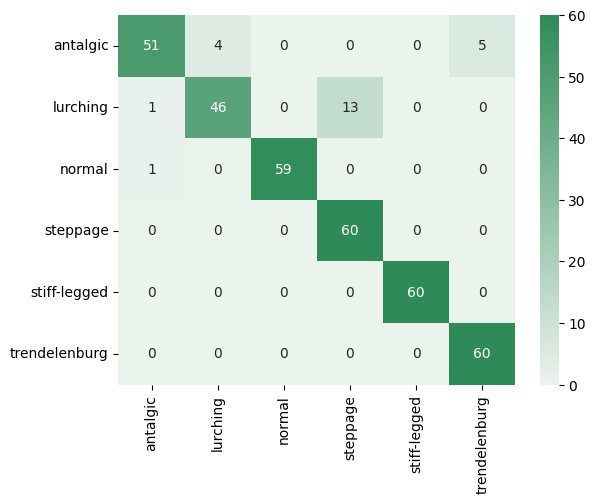

In [ ]:
y_true = np.argmax(y_test,axis=1)
acc_test = sum(pred==y_true)/len(y_test)


print("=========================== Test set accuracy ===========================\n")
print(acc_test)
print("\n======================= Test set Confusion Matrix =======================\n")
print
cf_matrix = confusion_matrix(y_true, pred)
categories = list(response_malattie.keys())

sns.heatmap(cf_matrix, annot=True,
            xticklabels = categories,
            yticklabels = categories,
            cmap=sns.light_palette("seagreen", as_cmap=True))
plt.show()

